In [1]:
from scipy import stats
from scipy.stats import pearsonr
from scipy.spatial import distance
import pandas as pd
import numpy as np
from matplotlib import pyplot 
import matplotlib.pyplot as plt
from scipy.stats import wasserstein_distance


In [2]:
!pip install seaborn
import seaborn as sns

You should consider upgrading via the '/Users/luna/anaconda3/bin/python -m pip install --upgrade pip' command.


### This notebook has 3 parts. 
---poland
### 1. Part one - policies
    1.1 Reading in the policy data of countries
    1.2 Extracting policy scores
    1.3 Preparing policy data frame
    1.4 Independent variable
    1.5 Statistics of policies
    1.6 Sub-indicators
### 2. Part two   - editorials 
    2.1 Reading in the editorship data
    2.2 Preparing editorship data for 2020
    2.3 Daily ratios 2020
    2.4 Preparing editorship data for 2019

### 3. Part three -  Experiments
    3.1 EXPERIMENT 1: Weekly normalizated data
    00. Experiment 0: Yearly normallized data
    3.2 EXPERIMENT 2: Weekly and yearly normalized data
    3.3 Outlier detection and removal
        3.3.1 EXPERIMENT 3: Outlier detection & removal for 2019 [ for weekly normalized data ]
        3.3.2 EXPERIMENT 4: Outlier detection & removal for 2019 [ for weekly&yearly normalized data ]
    3.4 EXPERIMENT 5: Moving average smoothing 2019/2020 
    3.5 Feature selection - dimensionality reduction
       3.5.1 Correlation heatmap
           Jensen shanon
           Earthmover
       3.5.2 PCA
           3.5.2.1 pca - built in library
           3.5.2.2 pca manually


### 4. Results
    4.1 Metrics/Correlation comparisons 

    





# Part one

### 1.1 Reading in the policy data of countries

In [3]:


c1_school_closing = pd.read_csv("/Users/luna/Downloads/covid-policy-tracker-master/data/timeseries/c1_school_closing.csv")
del c1_school_closing['Unnamed: 0']
print("number of countries & number of days is", c1_school_closing.shape[0], ",", c1_school_closing.shape[1]-2)

c2_workplace_closing = pd.read_csv("/Users/luna/Downloads/covid-policy-tracker-master/data/timeseries/c2_workplace_closing.csv")
del c2_workplace_closing['Unnamed: 0']
print(c2_workplace_closing.shape)


c3_cancel_public_events = pd.read_csv("/Users/luna/Downloads/covid-policy-tracker-master/data/timeseries/c3_cancel_public_events.csv")
del c3_cancel_public_events['Unnamed: 0']
print(c3_cancel_public_events.shape)


c4_restrictions_on_gatherings= pd.read_csv("/Users/luna/Downloads/covid-policy-tracker-master/data/timeseries/c4_restrictions_on_gatherings.csv")
del c4_restrictions_on_gatherings['Unnamed: 0']
print(c4_restrictions_on_gatherings.shape)



c5_close_public_transport = pd.read_csv("/Users/luna/Downloads/covid-policy-tracker-master/data/timeseries/c5_close_public_transport.csv")
del c5_close_public_transport['Unnamed: 0']
print(c5_close_public_transport.shape)

c6_stay_at_home_requirements = pd.read_csv("/Users/luna/Downloads/covid-policy-tracker-master/data/timeseries/c6_stay_at_home_requirements.csv")
del c6_stay_at_home_requirements['Unnamed: 0']
print(c6_stay_at_home_requirements.shape)



c7_movementrestrictions = pd.read_csv("/Users/luna/Downloads/covid-policy-tracker-master/data/timeseries/c7_movementrestrictions.csv")
del c7_movementrestrictions['Unnamed: 0']
print(c7_movementrestrictions.shape)

c8_internationaltravel = pd.read_csv("/Users/luna/Downloads/covid-policy-tracker-master/data/timeseries/c8_internationaltravel.csv")
del c8_internationaltravel['Unnamed: 0']
print(c8_internationaltravel.shape)


number of countries & number of days is 186 , 562
(186, 564)
(186, 564)
(186, 564)
(186, 564)
(186, 564)
(186, 564)
(186, 564)


In [4]:
#let's print out one of the 8 above dataframes

c8_internationaltravel.head(10)

,country_code,country_name,01Jan2020,02Jan2020,03Jan2020,04Jan2020,05Jan2020,06Jan2020,07Jan2020,08Jan2020,...,06Jul2021,07Jul2021,08Jul2021,09Jul2021,10Jul2021,11Jul2021,12Jul2021,13Jul2021,14Jul2021,15Jul2021
0,ABW,Aruba,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,AFG,Afghanistan,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,AGO,Angola,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,ALB,Albania,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,AND,Andorra,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,ARE,United Arab Emirates,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,ARG,Argentina,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,4.0,4.0,4.0,4.0,4.0,4.0,4.0,NaN,NaN,NaN
7,AUS,Australia,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,4.0,4.0,4.0,4.0,4.0,4.0,NaN,NaN,NaN,NaN
8,AUT,Austria,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0
9,AZE,Azerbaijan,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,4.0,4.0,4.0,4.0,4.0,4.0,4.0,NaN,NaN,NaN


In [5]:

"merging all the above 8 dataframes into 1"

frames = [c1_school_closing, c2_workplace_closing, c3_cancel_public_events,
          c4_restrictions_on_gatherings,c5_close_public_transport, 
          c6_stay_at_home_requirements,c7_movementrestrictions,c8_internationaltravel]

result = pd.concat(frames, axis=0) #default axis is 0

print( result.shape)

(1488, 564)


In [6]:
# here we will have all 8 indicators of all countries at one place in the result dataframe
result.head()

,country_code,country_name,01Jan2020,02Jan2020,03Jan2020,04Jan2020,05Jan2020,06Jan2020,07Jan2020,08Jan2020,...,06Jul2021,07Jul2021,08Jul2021,09Jul2021,10Jul2021,11Jul2021,12Jul2021,13Jul2021,14Jul2021,15Jul2021
0,ABW,Aruba,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,AFG,Afghanistan,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,AGO,Angola,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,ALB,Albania,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,2.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,AND,Andorra,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### 1.2 Extracting policy scores of Germany, hungary, italy, Poland and Sweden

In [7]:
#extracting restrinction policy scores of 8 policies for 5 different countries seperateöy
#de, hu, it, pl, se  

germany_policy = result[result['country_name'].str.contains('Germany')]
hungary_policy = result[result['country_name'].str.contains('hungary')]
italy_policy = result[result['country_name'].str.contains('Italy')]
poland_policy = result[result['country_name'].str.contains('Poland')]
sweden_policy = result[result['country_name'].str.contains('Sweden')]


#reseting index & taking away the extra index column
germany_policy.reset_index(inplace=True)
del germany_policy['index']
print("number of policies & number of days is", germany_policy.shape[0],",", germany_policy.shape[1]-2 )

hungary_policy.reset_index(inplace=True)
del hungary_policy['index']

italy_policy.reset_index(inplace=True)
del italy_policy['index']

poland_policy.reset_index(inplace=True)
del poland_policy['index']

sweden_policy.reset_index(inplace=True)
del sweden_policy['index']



number of policies & number of days is 8 , 562


In [8]:
#summing up the scores of 8 policies into one new row as the sum of sub policies (previous rows )
# suming previous rows to get the total daily policy score 

germany_policy.loc["Daily_Sum"] = germany_policy.sum()
hungary_policy.loc["Daily_Sum"] = hungary_policy.sum()
italy_policy.loc["Daily_Sum"] = italy_policy.sum()
poland_policy.loc["Daily_Sum"] = poland_policy.sum()
sweden_policy.loc["Daily_Sum"] =sweden_policy.sum()



/Users/luna/anaconda3/lib/python3.6/site-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)


In [9]:
#inspect germany dataframe
germany_policy.head(10)

#The last row is the sum of all the above rows called "Daily_Sum"

,country_code,country_name,01Jan2020,02Jan2020,03Jan2020,04Jan2020,05Jan2020,06Jan2020,07Jan2020,08Jan2020,...,06Jul2021,07Jul2021,08Jul2021,09Jul2021,10Jul2021,11Jul2021,12Jul2021,13Jul2021,14Jul2021,15Jul2021
0,DEU,Germany,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,NaN,NaN
1,DEU,Germany,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,NaN,NaN
2,DEU,Germany,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,NaN,NaN
3,DEU,Germany,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,NaN,NaN
4,DEU,Germany,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,NaN,NaN
5,DEU,Germany,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,NaN,NaN
6,DEU,Germany,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,NaN,NaN
7,DEU,Germany,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,NaN,NaN
Daily_Sum,DEUDEUDEUDEUDEUDEUDEUDEU,GermanyGermanyGermanyGermanyGermanyGermanyGerm...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,15.0,15.0,15.0,15.0,15.0,15.0,15.0,15.0,0.0,0.0


### 1.3 Preparing policy dataframe of  poland

In [10]:

#extract the poland policy column 
#Transpose so that we get the total sum as a column at the end 

poland_policy_transposed =poland_policy.T 
poland_policy_transposed.reset_index(inplace=True)

poland_policy_transposed = poland_policy_transposed.drop(labels=0, axis=0)
poland_policy_transposed.rename(columns=poland_policy_transposed.iloc[0])
poland_policy_transposed.head()

,index,0,1,2,3,4,5,6,7,Daily_Sum
1,country_name,Poland,Poland,Poland,Poland,Poland,Poland,Poland,Poland,PolandPolandPolandPolandPolandPolandPolandPoland
2,01Jan2020,0,0,0,0,0,0,0,0,0
3,02Jan2020,0,0,0,0,0,0,0,0,0
4,03Jan2020,0,0,0,0,0,0,0,0,0
5,04Jan2020,0,0,0,0,0,0,0,0,0


In [11]:
#drop the first row
poland_policy_transposed=poland_policy_transposed.iloc[1:,:]
poland_policy_transposed.head()

,index,0,1,2,3,4,5,6,7,Daily_Sum
2,01Jan2020,0,0,0,0,0,0,0,0,0
3,02Jan2020,0,0,0,0,0,0,0,0,0
4,03Jan2020,0,0,0,0,0,0,0,0,0
5,04Jan2020,0,0,0,0,0,0,0,0,0
6,05Jan2020,0,0,0,0,0,0,0,0,0


In [12]:
print(poland_policy_transposed.iloc[60:65, :])

        index  0  1  2  3  4  5  6  7 Daily_Sum
62  01Mar2020  0  0  0  0  0  0  0  0         0
63  02Mar2020  0  0  0  0  0  0  0  0         0
64  03Mar2020  0  0  0  0  0  0  0  0         0
65  04Mar2020  0  0  0  0  0  0  0  0         0
66  05Mar2020  0  0  0  0  0  0  0  0         0


In [13]:
poland_policy_transposed.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 562 entries, 2 to 563
Data columns (total 10 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   index      562 non-null    object
 1   0          556 non-null    object
 2   1          556 non-null    object
 3   2          556 non-null    object
 4   3          556 non-null    object
 5   4          556 non-null    object
 6   5          556 non-null    object
 7   6          556 non-null    object
 8   7          556 non-null    object
 9   Daily_Sum  562 non-null    object
dtypes: object(10)
memory usage: 48.3+ KB


In [14]:
poland_policy_transposed.iloc[:,1] = poland_policy_transposed.iloc[:,1].astype(str).astype(float)
poland_policy_transposed.iloc[:,2] = poland_policy_transposed.iloc[:,2].astype(str).astype(float)
poland_policy_transposed.iloc[:,3] = poland_policy_transposed.iloc[:,3].astype(str).astype(float)
poland_policy_transposed.iloc[:,4] = poland_policy_transposed.iloc[:,4].astype(str).astype(float)
poland_policy_transposed.iloc[:,5] = poland_policy_transposed.iloc[:,5].astype(str).astype(float)
poland_policy_transposed.iloc[:,6] = poland_policy_transposed.iloc[:,6].astype(str).astype(float)
poland_policy_transposed.iloc[:,7] = poland_policy_transposed.iloc[:,7].astype(str).astype(float)
poland_policy_transposed.iloc[:,8] = poland_policy_transposed.iloc[:,8].astype(str).astype(float)
poland_policy_transposed.iloc[:,9] = poland_policy_transposed.iloc[:,9].astype(str).astype(float)

poland_policy_transposed.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 562 entries, 2 to 563
Data columns (total 10 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   index      562 non-null    object 
 1   0          556 non-null    float64
 2   1          556 non-null    float64
 3   2          556 non-null    float64
 4   3          556 non-null    float64
 5   4          556 non-null    float64
 6   5          556 non-null    float64
 7   6          556 non-null    float64
 8   7          556 non-null    float64
 9   Daily_Sum  562 non-null    float64
dtypes: float64(9), object(1)
memory usage: 48.3+ KB


In [15]:
# rename the "index column" to "Date" and change it from string to datetime

poland_policy_transposed.columns
#poland_policy_transposed.columns=['Date', 0, 1, 2, 3, 4, 5, 6, 7, 'Daily_Sum']

poland_policy_transposed.columns=['Date', 'school', 'workplace', 'events','gatherings','transport', 
                  'home','movementrestrict','internationaltravel', 'Daily_Sum']


poland_policy_transposed['Date']=pd.to_datetime(poland_policy_transposed['Date'])

poland_policy_transposed.head()

,Date,school,workplace,events,gatherings,transport,home,movementrestrict,internationaltravel,Daily_Sum
2,2020-01-01,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,2020-01-02,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,2020-01-03,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,2020-01-04,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6,2020-01-05,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


## 1.4 Independent variable for poland = weekely policy average

In [16]:

#extract the week number (of the year) and add it as a new column at the end

poland_policy_transposed['week_of_year']= poland_policy_transposed['Date'].apply(lambda x: x.isocalendar()[1])
poland_policy_transposed.head(10)

,Date,school,workplace,events,gatherings,transport,home,movementrestrict,internationaltravel,Daily_Sum,week_of_year
2,2020-01-01,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
3,2020-01-02,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
4,2020-01-03,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
5,2020-01-04,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
6,2020-01-05,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
7,2020-01-06,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2
8,2020-01-07,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2
9,2020-01-08,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2
10,2020-01-09,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2
11,2020-01-10,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2


In [17]:
# slice and set a new dataframe where 1<week_of_year<52 and  data belongs to 2020

poland_policy_transposed_FirstLastWeekDropped=poland_policy_transposed.loc[( (poland_policy_transposed['Date'] < '2021-01-01 00:00:00') & (poland_policy_transposed['week_of_year']< 52) & (1<poland_policy_transposed['week_of_year']))]

#head
poland_policy_transposed_FirstLastWeekDropped.head()


,Date,school,workplace,events,gatherings,transport,home,movementrestrict,internationaltravel,Daily_Sum,week_of_year
7,2020-01-06,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2
8,2020-01-07,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2
9,2020-01-08,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2
10,2020-01-09,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2
11,2020-01-10,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2


In [18]:
#tail
poland_policy_transposed_FirstLastWeekDropped.tail()

,Date,school,workplace,events,gatherings,transport,home,movementrestrict,internationaltravel,Daily_Sum,week_of_year
352,2020-12-16,3.0,2.0,2.0,4.0,1.0,1.0,1.0,3.0,17.0,51
353,2020-12-17,3.0,2.0,2.0,4.0,1.0,1.0,1.0,3.0,17.0,51
354,2020-12-18,3.0,2.0,2.0,4.0,1.0,1.0,1.0,3.0,17.0,51
355,2020-12-19,3.0,2.0,2.0,4.0,1.0,1.0,1.0,3.0,17.0,51
356,2020-12-20,3.0,2.0,2.0,4.0,1.0,1.0,1.0,3.0,17.0,51


##  1.5 Statistics of policies for poland

In [19]:
poland_policy_transposed_FirstLastWeekDropped.describe()

,school,workplace,events,gatherings,transport,home,movementrestrict,internationaltravel,Daily_Sum,week_of_year
count,350.000000,350.000000,350.000000,350.000000,350.000000,350.000000,350.000000,350.000000,350.000000,350.000000
mean,1.822857,1.405714,0.948571,2.102857,0.425714,0.362857,0.580000,2.688571,10.337143,26.500000
std,1.095729,0.915308,0.941063,1.627395,0.495159,0.532382,0.778029,1.363728,6.563819,14.451529
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000
25%,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000,4.750000,14.000000
50%,2.000000,2.000000,1.000000,2.000000,0.000000,0.000000,0.000000,3.000000,9.000000,26.500000
75%,3.000000,2.000000,2.000000,4.000000,1.000000,1.000000,1.000000,4.000000,17.000000,39.000000
max,3.000000,2.000000,2.000000,4.000000,1.000000,2.000000,2.000000,4.000000,19.000000,51.000000


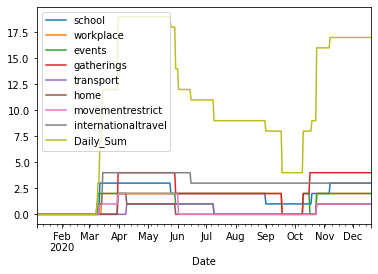

In [20]:
poland_policy_transposed_FirstLastWeekDropped.plot(x="Date", y=[ 'school', 'workplace', 'events','gatherings','transport', 
                  'home','movementrestrict','internationaltravel', 'Daily_Sum'])
plt.show()

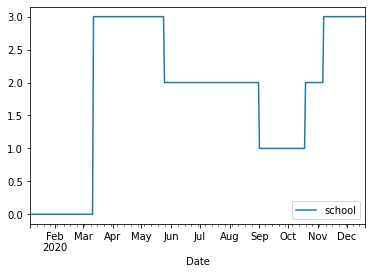

In [21]:
df1 = poland_policy_transposed_FirstLastWeekDropped[["Date", "school"]]
df1.plot(x="Date", y="school")
plt.show()

Daily policy fluctuations poland


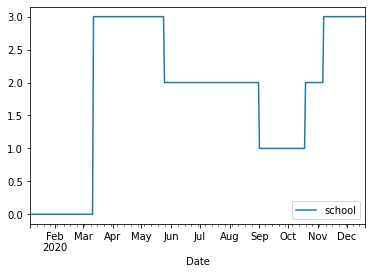

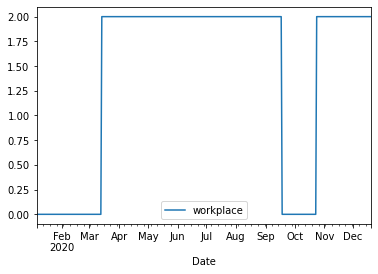

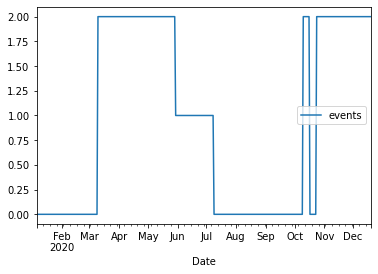

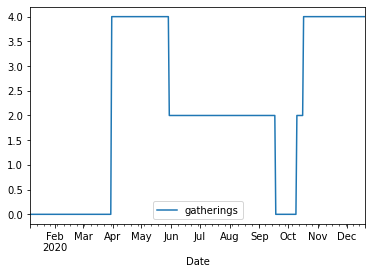

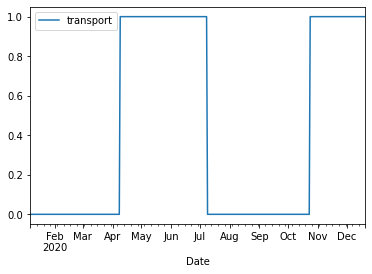

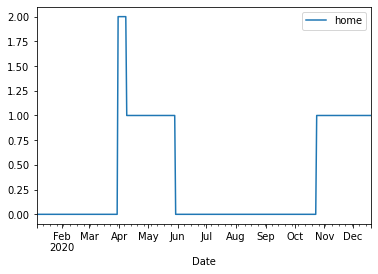

In [22]:
df1 = poland_policy_transposed_FirstLastWeekDropped[["Date", "school"]]
df2 = poland_policy_transposed_FirstLastWeekDropped[["Date", "workplace"]]
df3 = poland_policy_transposed_FirstLastWeekDropped[["Date", "events"]]
df4 = poland_policy_transposed_FirstLastWeekDropped[["Date", "gatherings"]]
df5 = poland_policy_transposed_FirstLastWeekDropped[["Date", "transport"]]
df6 = poland_policy_transposed_FirstLastWeekDropped[["Date", "home"]]
df7 = poland_policy_transposed_FirstLastWeekDropped[["Date", "movementrestrict"]]
df8 = poland_policy_transposed_FirstLastWeekDropped[["Date", "internationaltravel"]]


#define number of rows and columns for subplots
nrow=3
ncol=2

# make a list of all dataframes 
df_list = [df1 ,df2, df3, df4, df5, df6, df7, df8]
#fig, axes = plt.subplots(nrow, ncol)

# plot counter
count=0
for r in range(nrow):
    for c in range( ncol):
        yi=df_list[count].columns[1]
        df_list[count].plot(x="Date", y=yi)

        count+=1
print("Daily policy fluctuations poland")       
plt.show()

In [23]:
#poland_policy_transposed_FirstLastWeekDropped.hist(figsize=(20,15))
#plt.show()

In [24]:
#extract only the two columns of daily_sum and week_of year
policy_2020_total_poland=poland_policy_transposed_FirstLastWeekDropped.iloc[:,9:11]
print(policy_2020_total_poland.iloc[47:70,:])

    Daily_Sum  week_of_year
54        0.0             8
55        0.0             8
56        0.0             9
57        0.0             9
58        0.0             9
59        0.0             9
60        0.0             9
61        0.0             9
62        0.0             9
63        0.0            10
64        0.0            10
65        0.0            10
66        0.0            10
67        0.0            10
68        0.0            10
69        0.0            10
70        1.0            11
71        3.0            11
72        3.0            11
73        7.0            11
74        7.0            11
75        9.0            11
76       12.0            11


In [25]:
# 7 days 50 weeks = 350 data points
policy_2020_total_poland.shape

(350, 2)

## Group the daily sum by week

In [26]:
#group by week and sum up the daily_sums (within a week, i.e. within a group)
weekly_policy_2020_poland=policy_2020_total_poland.groupby(['week_of_year']).sum()
weekly_policy_2020_poland.columns=["Weekly_sum"] 

In [27]:
weekly_policy_2020_poland.head(10)

,Weekly_sum
week_of_year,
2,0.0
3,0.0
4,0.0
5,0.0
6,0.0
7,0.0
8,0.0
9,0.0
10,0.0


In [28]:
print(weekly_policy_2020_poland.iloc[:18, :])

              Weekly_sum
week_of_year            
2                    0.0
3                    0.0
4                    0.0
5                    0.0
6                    0.0
7                    0.0
8                    0.0
9                    0.0
10                   0.0
11                  42.0
12                  84.0
13                  84.0
14                 126.0
15                 133.0
16                 133.0
17                 133.0
18                 133.0
19                 133.0


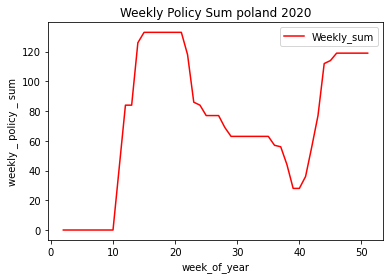

In [29]:
ax = plt.gca()
weekly_policy_2020_poland.plot(kind='line',y='Weekly_sum', color='red', ax=ax)
plt.title('Weekly Policy Sum poland 2020')
plt.ylabel('weekly _ policy _ sum')
plt.xlabel('week_of_year')

plt.show()

## Normalize weekly sums 

In [30]:
#average weekly independent variable 
weekly_ratio_policy_2020_poland=weekly_policy_2020_poland/7
weekly_ratio_policy_2020_poland.head(10)

,Weekly_sum
week_of_year,
2,0.0
3,0.0
4,0.0
5,0.0
6,0.0
7,0.0
8,0.0
9,0.0
10,0.0


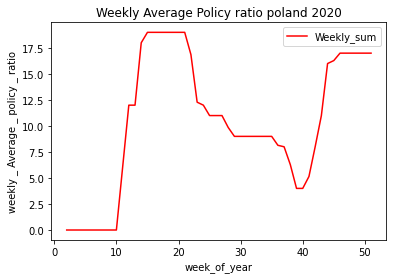

In [31]:
ax = plt.gca()
weekly_ratio_policy_2020_poland.plot(kind='line',y='Weekly_sum', color='red', ax=ax)
plt.title('Weekly Average Policy ratio poland 2020')
plt.ylabel('weekly _ Average _ policy _ ratio')
plt.xlabel('week_of_year')

plt.show()

In [32]:
#the final independent variable in list form 
weekly_ratio_policy_2020_poland=weekly_ratio_policy_2020_poland['Weekly_sum'].tolist()
print(weekly_ratio_policy_2020_poland[:14])

[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 6.0, 12.0, 12.0, 18.0, 19.0]


## 1.6 Sub- indicators
### Let's break down the total policy sum into sub policy indicators: define  sub features of IV

In [33]:
#extract only the two columns of daily_sum and week_of year
policy_2020_indicators_poland=poland_policy_transposed_FirstLastWeekDropped.iloc[:, 1:11]
print(policy_2020_indicators_poland.iloc[70:90,:])

    school  workplace  events  gatherings  transport  home  movementrestrict  \
77     3.0        2.0     2.0         0.0        0.0   0.0               1.0   
78     3.0        2.0     2.0         0.0        0.0   0.0               1.0   
79     3.0        2.0     2.0         0.0        0.0   0.0               1.0   
80     3.0        2.0     2.0         0.0        0.0   0.0               1.0   
81     3.0        2.0     2.0         0.0        0.0   0.0               1.0   
82     3.0        2.0     2.0         0.0        0.0   0.0               1.0   
83     3.0        2.0     2.0         0.0        0.0   0.0               1.0   
84     3.0        2.0     2.0         0.0        0.0   0.0               1.0   
85     3.0        2.0     2.0         0.0        0.0   0.0               1.0   
86     3.0        2.0     2.0         0.0        0.0   0.0               1.0   
87     3.0        2.0     2.0         0.0        0.0   0.0               1.0   
88     3.0        2.0     2.0         0.

### We keep all the sub indicators  for poland

In [34]:
#extract only the two columns of daily_sum and week_of year

#policy_2020_indicators_poland.drop('transport', inplace=True, axis=1)
print(policy_2020_indicators_poland.iloc[70:90,:])


    school  workplace  events  gatherings  transport  home  movementrestrict  \
77     3.0        2.0     2.0         0.0        0.0   0.0               1.0   
78     3.0        2.0     2.0         0.0        0.0   0.0               1.0   
79     3.0        2.0     2.0         0.0        0.0   0.0               1.0   
80     3.0        2.0     2.0         0.0        0.0   0.0               1.0   
81     3.0        2.0     2.0         0.0        0.0   0.0               1.0   
82     3.0        2.0     2.0         0.0        0.0   0.0               1.0   
83     3.0        2.0     2.0         0.0        0.0   0.0               1.0   
84     3.0        2.0     2.0         0.0        0.0   0.0               1.0   
85     3.0        2.0     2.0         0.0        0.0   0.0               1.0   
86     3.0        2.0     2.0         0.0        0.0   0.0               1.0   
87     3.0        2.0     2.0         0.0        0.0   0.0               1.0   
88     3.0        2.0     2.0         0.

In [35]:
#group by week and sum up the daily_sums (within a week, i.e. within a group)
weekly_policy_2020_poland_indicators=policy_2020_indicators_poland.groupby(['week_of_year']).sum()
weekly_policy_2020_poland_indicators.columns=["weekly_school", "weekly_workplace", "weekly_events","weekly_gatherings"
                                             ,"weekly_transportation","weekly_home", "weekly_movement", "weekly_travel", "weekly_sum"] 
print(weekly_policy_2020_poland_indicators.iloc[45:50, :])


              weekly_school  weekly_workplace  weekly_events  \
week_of_year                                                   
47                     21.0              14.0           14.0   
48                     21.0              14.0           14.0   
49                     21.0              14.0           14.0   
50                     21.0              14.0           14.0   
51                     21.0              14.0           14.0   

              weekly_gatherings  weekly_transportation  weekly_home  \
week_of_year                                                          
47                         28.0                    7.0          7.0   
48                         28.0                    7.0          7.0   
49                         28.0                    7.0          7.0   
50                         28.0                    7.0          7.0   
51                         28.0                    7.0          7.0   

              weekly_movement  weekly_travel  weekly_

### Now we have weekly average of every single indicator (except transporation which was dropped)

In [36]:
#average weekly independent variable 
weekly_policy_2020_poland_indicators_ratio=weekly_policy_2020_poland_indicators/7
weekly_policy_2020_poland_indicators_ratio.head(10)

,weekly_school,weekly_workplace,weekly_events,weekly_gatherings,weekly_transportation,weekly_home,weekly_movement,weekly_travel,weekly_sum
week_of_year,,,,,,,,,
2,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.0
3,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.0
4,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.0
5,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.0
6,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.0
7,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.0
8,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.0
9,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.0
10,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.0


# Part two

## 2.1  Reading in the editorship data


In [37]:

#Reading in the editorship data of the 5 countries


from datetime import datetime
import datetime
import sys
sys.path.insert(1, "../src")



revs_germany = pd.read_csv("/Users/luna/Desktop/Wikipedia_Rhythms/data/revisions_countrywide/dewiki.csv")
revs_hungary = pd.read_csv("/Users/luna/Desktop/Wikipedia_Rhythms/data/revisions_countrywide/huwiki.csv")
revs_italy = pd.read_csv("/Users/luna/Desktop/Wikipedia_Rhythms/data/revisions_countrywide/itwiki.csv")
revs_poland = pd.read_csv("/Users/luna/Desktop/Wikipedia_Rhythms/data/revisions_countrywide/plwiki.csv")
revs_sweden = pd.read_csv("/Users/luna/Desktop/Wikipedia_Rhythms/data/revisions_countrywide/sewiki.csv")

print(revs_germany.shape)
print(revs_hungary.shape)
print(revs_italy.shape)
print(revs_poland.shape)
print(revs_sweden.shape)

(29638, 5)
(29632, 5)
(29627, 5)
(29639, 5)
(3646, 5)


In [38]:
#test #get week number
datetime.date(2010, 6, 16).weekday()


2

In [39]:
#test #get hour number
datetime.datetime(2017, 11, 28, 23, 55, 59, 342380).hour


23

In [40]:
revs_poland.head()

,y,m,d,h,c
0,2018,1,1,0,247
1,2018,1,1,1,189
2,2018,1,1,2,98
3,2018,1,1,3,161
4,2018,1,1,4,75


In [41]:

#making up the datetime structure 
revs_poland['dateInt']=revs_poland['y'].astype(str) + revs_poland['m'].astype(str).str.zfill(2)+ revs_poland['d'].astype(str).str.zfill(2)
revs_poland['Date'] = pd.to_datetime(revs_poland['dateInt'], format='%Y%m%d')      
revs_poland = revs_poland.reset_index()
revs_poland.head()

,index,y,m,d,h,c,dateInt,Date
0,0,2018,1,1,0,247,20180101,2018-01-01
1,1,2018,1,1,1,189,20180101,2018-01-01
2,2,2018,1,1,2,98,20180101,2018-01-01
3,3,2018,1,1,3,161,20180101,2018-01-01
4,4,2018,1,1,4,75,20180101,2018-01-01


In [42]:
print(revs_poland.iloc[50:55, :])

    index     y  m  d  h    c   dateInt       Date
50     50  2018  1  3  2  134  20180103 2018-01-03
51     51  2018  1  3  3   56  20180103 2018-01-03
52     52  2018  1  3  4   53  20180103 2018-01-03
53     53  2018  1  3  5   46  20180103 2018-01-03
54     54  2018  1  3  6   89  20180103 2018-01-03


In [43]:

#extract the week number and add it as a new column
revs_poland['week_of_year']= revs_poland['Date'].apply(lambda x: x.isocalendar()[1])

#extract the hour of the week
#revs_poland['hour_of_week']=revs_poland['Date'].apply(lambda x: x.hour+ (24*x.weekday())  )
revs_poland['hour_of_week']=revs_poland['Date'].apply(lambda x: 24*x.weekday()) + revs_poland['h']


#https://stackoverflow.com/questions/9847213/how-do-i-get-the-day-of-week-given-a-date
revs_poland.head(10)

,index,y,m,d,h,c,dateInt,Date,week_of_year,hour_of_week
0,0,2018,1,1,0,247,20180101,2018-01-01,1,0
1,1,2018,1,1,1,189,20180101,2018-01-01,1,1
2,2,2018,1,1,2,98,20180101,2018-01-01,1,2
3,3,2018,1,1,3,161,20180101,2018-01-01,1,3
4,4,2018,1,1,4,75,20180101,2018-01-01,1,4
5,5,2018,1,1,5,74,20180101,2018-01-01,1,5
6,6,2018,1,1,6,47,20180101,2018-01-01,1,6
7,7,2018,1,1,7,213,20180101,2018-01-01,1,7
8,8,2018,1,1,8,188,20180101,2018-01-01,1,8
9,9,2018,1,1,9,154,20180101,2018-01-01,1,9


### 2.2 Prepare editorship data poland for 2020

In [44]:
#We get all data which is from 2020 and  where  1< week_of_year <52 
revs_poland_2020=revs_poland.loc[(revs_poland['Date'] >= '2020-01-01 00:00:00') & (revs_poland['Date'] < '2021-01-01 00:00:00')& (revs_poland['week_of_year'] < 52)& (1<revs_poland['week_of_year'])]
revs_poland_2020.head(10)

,index,y,m,d,h,c,dateInt,Date,week_of_year,hour_of_week
17640,17640,2020,1,6,0,537,20200106,2020-01-06,2,0
17641,17641,2020,1,6,1,88,20200106,2020-01-06,2,1
17642,17642,2020,1,6,2,47,20200106,2020-01-06,2,2
17643,17643,2020,1,6,3,52,20200106,2020-01-06,2,3
17644,17644,2020,1,6,4,33,20200106,2020-01-06,2,4
17645,17645,2020,1,6,5,91,20200106,2020-01-06,2,5
17646,17646,2020,1,6,6,46,20200106,2020-01-06,2,6
17647,17647,2020,1,6,7,140,20200106,2020-01-06,2,7
17648,17648,2020,1,6,8,208,20200106,2020-01-06,2,8
17649,17649,2020,1,6,9,269,20200106,2020-01-06,2,9


In [45]:
#tail
revs_poland_2020.tail(5)

,index,y,m,d,h,c,dateInt,Date,week_of_year,hour_of_week
26035,26035,2020,12,20,19,323,20201220,2020-12-20,51,163
26036,26036,2020,12,20,20,316,20201220,2020-12-20,51,164
26037,26037,2020,12,20,21,298,20201220,2020-12-20,51,165
26038,26038,2020,12,20,22,294,20201220,2020-12-20,51,166
26039,26039,2020,12,20,23,201,20201220,2020-12-20,51,167


In [46]:

#group by 'week_of_year', 'hour_of_week' 

grouped_poland_2020=revs_poland_2020.groupby(['week_of_year', 'hour_of_week']).sum()

grouped_poland_2020 = grouped_poland_2020.reset_index()
grouped_poland_2020.head(10)

,week_of_year,hour_of_week,index,y,m,d,h,c
0,2,0,17640,2020,1,6,0,537
1,2,1,17641,2020,1,6,1,88
2,2,2,17642,2020,1,6,2,47
3,2,3,17643,2020,1,6,3,52
4,2,4,17644,2020,1,6,4,33
5,2,5,17645,2020,1,6,5,91
6,2,6,17646,2020,1,6,6,46
7,2,7,17647,2020,1,6,7,140
8,2,8,17648,2020,1,6,8,208
9,2,9,17649,2020,1,6,9,269


In [47]:
#tail
grouped_poland_2020.tail(5)

,week_of_year,hour_of_week,index,y,m,d,h,c
8395,51,163,26035,2020,12,20,19,323
8396,51,164,26036,2020,12,20,20,316
8397,51,165,26037,2020,12,20,21,298
8398,51,166,26038,2020,12,20,22,294
8399,51,167,26039,2020,12,20,23,201


In [48]:

#populate the numpy array 

array_weekly_events_poland_2020 = np.zeros((52,168))


for  i in range (grouped_poland_2020.shape[0]):
    
    week=grouped_poland_2020.iloc[i]['week_of_year']
    hour=grouped_poland_2020.iloc[i]['hour_of_week']
    array_weekly_events_poland_2020[week][hour]= grouped_poland_2020.iloc[i]['c']



In [49]:
print(array_weekly_events_poland_2020)

[[  0.   0.   0. ...   0.   0.   0.]
 [  0.   0.   0. ...   0.   0.   0.]
 [537.  88.  47. ... 347. 481. 341.]
 ...
 [343.  91.  41. ... 540. 455. 243.]
 [132.  85.  88. ... 567. 445. 257.]
 [165. 207.  86. ... 298. 294. 201.]]


In [50]:
print(array_weekly_events_poland_2020[3][:])

[537. 101.  62. 146. 117. 138.  76. 200. 173. 368. 308. 321. 333. 348.
 260. 305. 375. 372. 337. 701. 371. 423. 313. 196. 125.  77.  45.  38.
  68. 108.  56. 180. 232. 268. 367. 322. 267. 312. 276. 364. 391. 350.
 341. 354. 421. 364. 494. 201. 116.  83.  98.  96.  93. 153. 147. 217.
 306. 280. 260. 337. 331. 343. 334. 369. 333. 334. 331. 252. 437. 367.
 351. 171. 114. 136. 117. 112.  49.  82. 102. 157. 206. 371. 289. 437.
 269. 308. 331. 294. 314. 414. 389. 322. 339. 514. 579. 189. 100.  75.
  44.  56.  43.  94.  70. 267. 274. 275. 352. 363. 433. 293. 228. 454.
 315. 226. 601. 194. 242. 396. 251. 193. 202. 191.  56.  79.  57. 203.
 131. 157. 202. 286. 253. 298. 400. 400. 392. 504. 474. 439. 424. 477.
 336. 395. 242. 279. 188.  65.  37.  59.  58. 104.  84. 128. 277. 331.
 305. 391. 310. 359. 421. 376. 412. 517. 399. 487. 348. 380. 297. 225.]


In [51]:
#we need the weekly_sums to be able to devide the daily counts by this total weely sum
weekly_sum_poland_2020=np.sum(array_weekly_events_poland_2020 , axis=1)
print(weekly_sum_poland_2020)

[     0.      0.  45680.  44749.  43142.  46374.  63660.  61390.  51120.
  57919.  55674.  59889.  69541.  68688.  58324.  57591. 107543.  73371.
  64382.  66537.  68940.  55121.  59265.  56101.  49391.  54014.  64282.
  67845.  78158.  46439.  40676.  40954.  41888.  39295.  48439.  45894.
  48706.  40269.  40511.  48019.  59388.  46492.  50494.  51230.  46553.
  52885.  53432.  68575.  73766.  68108.  52767.  45887.]


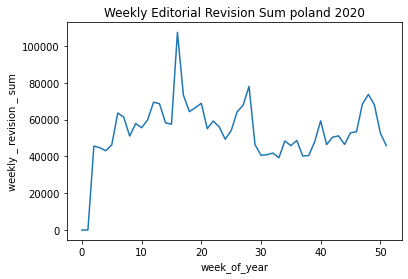

In [52]:
ax = plt.gca()

plt.plot(weekly_sum_poland_2020) 
plt.title('Weekly Editorial Revision Sum poland 2020')
plt.ylabel('weekly _ revision _ sum')
plt.xlabel('week_of_year')
plt.show()

In [53]:
#we need the yearly_sums to be able to normalize the daily counts by this total yearly sum
yearly_sum_2020_poland=np.sum(weekly_sum_poland_2020)
yearly_sum_2020_poland

2799358.0

### 2.3  168 daily ratios for 2020 poland

In [54]:

array_weekly_ratios_poland_2020=np.zeros((50,168))
    
for i in range (50):
    
    #becaue the first two rows of array_weekly_events_poland_2020 
    #were all zeros( belonging to the 0th and 1st week) --> we move the indice by 2  -->so we skip the first two rows of the nummpy array
    
    array_weekly_ratios_poland_2020[i]=array_weekly_events_poland_2020[i+2]/weekly_sum_poland_2020[i+2]

print(array_weekly_ratios_poland_2020)

[[0.01175569 0.00192644 0.0010289  ... 0.00759632 0.01052977 0.00746497]
 [0.01200027 0.00225703 0.00138551 ... 0.00849181 0.00663702 0.00502805]
 [0.00222521 0.00159937 0.00069538 ... 0.01244727 0.00903991 0.0055862 ]
 ...
 [0.00503612 0.00133611 0.00060199 ... 0.00792858 0.00668057 0.00356786]
 [0.00250156 0.00161086 0.00166771 ... 0.01074535 0.0084333  0.00487047]
 [0.00359579 0.00451108 0.00187417 ... 0.00649421 0.00640704 0.00438033]]


In [55]:
print(array_weekly_ratios_poland_2020[1][:])

[0.01200027 0.00225703 0.00138551 0.00326264 0.00261458 0.00308387
 0.00169836 0.00446937 0.00386601 0.00822365 0.00688284 0.00717334
 0.00744151 0.00777671 0.00581019 0.00681579 0.00838008 0.00831303
 0.00753089 0.01566515 0.00829069 0.00945273 0.00699457 0.00437999
 0.00279336 0.00172071 0.00100561 0.00084918 0.00151959 0.00241346
 0.00125142 0.00402244 0.00518447 0.00598896 0.0082013  0.00719569
 0.00596661 0.00697222 0.00616774 0.00813426 0.00873763 0.0078214
 0.00762028 0.00791079 0.00940803 0.00813426 0.01103935 0.00449172
 0.00259224 0.00185479 0.00218999 0.0021453  0.00207826 0.00341907
 0.00328499 0.00484927 0.00683814 0.00625712 0.00581019 0.00753089
 0.00739681 0.00766498 0.00746385 0.00824599 0.00744151 0.00746385
 0.00739681 0.00563141 0.00976558 0.0082013  0.00784375 0.00382131
 0.00254754 0.00303917 0.00261458 0.00250285 0.001095   0.00183244
 0.00227938 0.00350846 0.00460345 0.00829069 0.00645824 0.00976558
 0.00601131 0.00688284 0.00739681 0.00656998 0.00701692 0.00925

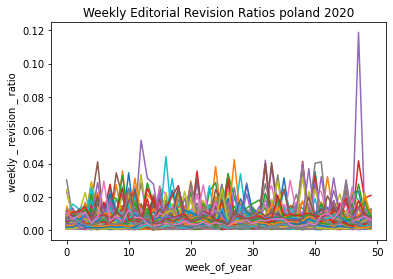

In [56]:
ax = plt.gca()

plt.plot(array_weekly_ratios_poland_2020) 
plt.title('Weekly Editorial Revision Ratios poland 2020')
plt.ylabel('weekly _ revision _ ratio')
plt.xlabel('week_of_year')
plt.show()

### 2.4 Prepare editorship data poland for 2019

In [57]:
#We get all data which is from 2019 and  where  1<week_of_year<52 

revs_poland_2019=revs_poland.loc[(revs_poland['Date'] >= '2019-01-01 00:00:00') & (revs_poland['Date'] < '2020-01-01 00:00:00') & (revs_poland['week_of_year'] < 52)& (1<revs_poland['week_of_year'])]
revs_poland_2019.head(10)

,index,y,m,d,h,c,dateInt,Date,week_of_year,hour_of_week
8904,8904,2019,1,7,0,236,20190107,2019-01-07,2,0
8905,8905,2019,1,7,1,162,20190107,2019-01-07,2,1
8906,8906,2019,1,7,2,119,20190107,2019-01-07,2,2
8907,8907,2019,1,7,3,99,20190107,2019-01-07,2,3
8908,8908,2019,1,7,4,99,20190107,2019-01-07,2,4
8909,8909,2019,1,7,5,122,20190107,2019-01-07,2,5
8910,8910,2019,1,7,6,122,20190107,2019-01-07,2,6
8911,8911,2019,1,7,7,252,20190107,2019-01-07,2,7
8912,8912,2019,1,7,8,349,20190107,2019-01-07,2,8
8913,8913,2019,1,7,9,263,20190107,2019-01-07,2,9


In [58]:
revs_poland_2019.tail(5)

,index,y,m,d,h,c,dateInt,Date,week_of_year,hour_of_week
17299,17299,2019,12,22,19,423,20191222,2019-12-22,51,163
17300,17300,2019,12,22,20,469,20191222,2019-12-22,51,164
17301,17301,2019,12,22,21,466,20191222,2019-12-22,51,165
17302,17302,2019,12,22,22,399,20191222,2019-12-22,51,166
17303,17303,2019,12,22,23,332,20191222,2019-12-22,51,167


In [59]:

grouped_poland_2019=revs_poland_2019.groupby(['week_of_year', 'hour_of_week']).sum()
grouped_poland_2019 = grouped_poland_2019.reset_index()
grouped_poland_2019.head(10)

,week_of_year,hour_of_week,index,y,m,d,h,c
0,2,0,8904,2019,1,7,0,236
1,2,1,8905,2019,1,7,1,162
2,2,2,8906,2019,1,7,2,119
3,2,3,8907,2019,1,7,3,99
4,2,4,8908,2019,1,7,4,99
5,2,5,8909,2019,1,7,5,122
6,2,6,8910,2019,1,7,6,122
7,2,7,8911,2019,1,7,7,252
8,2,8,8912,2019,1,7,8,349
9,2,9,8913,2019,1,7,9,263


In [60]:
grouped_poland_2019.tail(5)

,week_of_year,hour_of_week,index,y,m,d,h,c
8395,51,163,17299,2019,12,22,19,423
8396,51,164,17300,2019,12,22,20,469
8397,51,165,17301,2019,12,22,21,466
8398,51,166,17302,2019,12,22,22,399
8399,51,167,17303,2019,12,22,23,332


In [61]:


array_weekly_events_poland_2019 = np.zeros((52,168))



for  i in range (grouped_poland_2019.shape[0]):
    
    week=grouped_poland_2019.iloc[i]['week_of_year']
    hour=grouped_poland_2019.iloc[i]['hour_of_week']
    array_weekly_events_poland_2019[week][hour]= grouped_poland_2019.iloc[i]['c']

print(array_weekly_events_poland_2019)

[[  0.   0.   0. ...   0.   0.   0.]
 [  0.   0.   0. ...   0.   0.   0.]
 [236. 162. 119. ... 493. 349. 222.]
 ...
 [226.  48.  12. ... 379. 261. 214.]
 [ 93.  42.  22. ... 398. 318. 194.]
 [ 73.  44.  53. ... 466. 399. 332.]]


In [62]:
print(array_weekly_events_poland_2020[3][:])

[537. 101.  62. 146. 117. 138.  76. 200. 173. 368. 308. 321. 333. 348.
 260. 305. 375. 372. 337. 701. 371. 423. 313. 196. 125.  77.  45.  38.
  68. 108.  56. 180. 232. 268. 367. 322. 267. 312. 276. 364. 391. 350.
 341. 354. 421. 364. 494. 201. 116.  83.  98.  96.  93. 153. 147. 217.
 306. 280. 260. 337. 331. 343. 334. 369. 333. 334. 331. 252. 437. 367.
 351. 171. 114. 136. 117. 112.  49.  82. 102. 157. 206. 371. 289. 437.
 269. 308. 331. 294. 314. 414. 389. 322. 339. 514. 579. 189. 100.  75.
  44.  56.  43.  94.  70. 267. 274. 275. 352. 363. 433. 293. 228. 454.
 315. 226. 601. 194. 242. 396. 251. 193. 202. 191.  56.  79.  57. 203.
 131. 157. 202. 286. 253. 298. 400. 400. 392. 504. 474. 439. 424. 477.
 336. 395. 242. 279. 188.  65.  37.  59.  58. 104.  84. 128. 277. 331.
 305. 391. 310. 359. 421. 376. 412. 517. 399. 487. 348. 380. 297. 225.]


In [63]:
weekly_sum_poland_2019=np.sum(array_weekly_events_poland_2019 , axis=1)
print(weekly_sum_poland_2019)

[    0.     0. 52325. 54718. 56413. 80696. 52175. 69595. 55681. 47686.
 46421. 83086. 51662. 54655. 53803. 45676. 43218. 48446. 44564. 44813.
 40923. 36721. 41684. 35303. 37639. 39838. 34124. 34647. 39605. 35255.
 34858. 33884. 33884. 34291. 58556. 43040. 33126. 34477. 39174. 71400.
 75118. 39004. 41773. 36249. 57272. 42383. 41250. 87147. 68305. 42926.
 44087. 55727.]


In [64]:
#we need the yearly_sums to be able to normalize the daily counts by this total yearly sum
yearly_sum_2019_poland=np.sum(weekly_sum_poland_2019)
yearly_sum_2019_poland

2409303.0

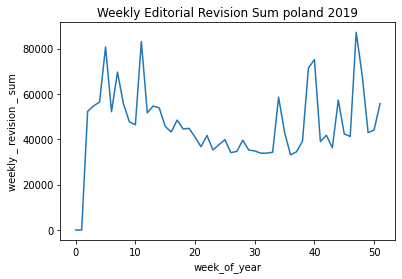

In [65]:
ax = plt.gca()

plt.plot(weekly_sum_poland_2019) 
plt.title('Weekly Editorial Revision Sum poland 2019')
plt.ylabel('weekly _ revision _ sum')
plt.xlabel('week_of_year')
plt.show()

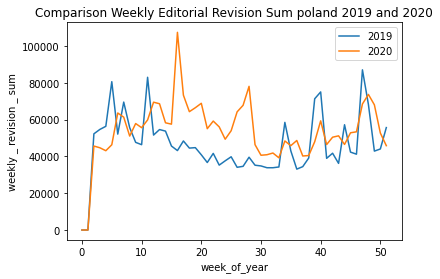

In [66]:

plt.plot(weekly_sum_poland_2019, label= '2019') 
plt.plot(weekly_sum_poland_2020, label= '2020') 

plt.title('Comparison Weekly Editorial Revision Sum poland 2019 and 2020')
plt.ylabel('weekly _ revision _ sum')
plt.xlabel('week_of_year')
plt.legend()

plt.show()

# Part three: Experiments 



## 3.1 EXPERIMENT 1:  Weekly normalizated data

### Normalize by weekly sums

In [67]:

array_weekly_ratios_poland_2019=np.zeros((50,168))
    
for i in range (50):
    
    
    array_weekly_ratios_poland_2019[i]=array_weekly_events_poland_2019[i+2]/weekly_sum_poland_2019[i+2]

print(array_weekly_ratios_poland_2019)

[[0.00451027 0.00309603 0.00227425 ... 0.00942188 0.00666985 0.00424271]
 [0.00319822 0.00124274 0.00100515 ... 0.00990533 0.00570196 0.00301546]
 [0.0021449  0.00150674 0.00070906 ... 0.00834914 0.00569018 0.00384663]
 ...
 [0.00526487 0.0011182  0.00027955 ... 0.00882915 0.00608023 0.00498532]
 [0.00210947 0.00095266 0.00049901 ... 0.0090276  0.00721301 0.00440039]
 [0.00130996 0.00078956 0.00095107 ... 0.00836219 0.0071599  0.00595761]]


In [68]:
print(array_weekly_ratios_poland_2019[1][:])

[0.00319822 0.00124274 0.00100515 0.0010417  0.00095033 0.00217479
 0.001791   0.00243064 0.00524507 0.00601265 0.00720056 0.00582989
 0.00740159 0.01200702 0.00771227 0.00685332 0.00643298 0.01008809
 0.01242735 0.00794985 0.00635988 0.00570196 0.00400234 0.00307029
 0.0018641  0.00155342 0.0008224  0.00065792 0.00078585 0.00197376
 0.01091049 0.00314339 0.005373   0.00540955 0.00950327 0.00749296
 0.00678022 0.00676194 0.00767572 0.00988706 0.02231441 0.02679191
 0.00831536 0.01019774 0.00862605 0.00705435 0.00643298 0.00723711
 0.0033627  0.0009686  0.00105998 0.00100515 0.00084067 0.00233927
 0.00157169 0.00310684 0.01118462 0.02644468 0.00890018 0.00542783
 0.00451405 0.00734676 0.00816916 0.00696297 0.007164   0.00699952
 0.00769399 0.00793158 0.0069447  0.00975913 0.01363354 0.0078402
 0.00363683 0.001791   0.00158997 0.00131584 0.00155342 0.00184583
 0.00244892 0.00367338 0.00361855 0.00478819 0.00690815 0.00879053
 0.00884535 0.00561059 0.00467853 0.0070909  0.00983223 0.01016

No handles with labels found to put in legend.


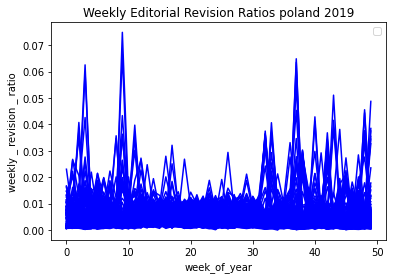

In [69]:
ax = plt.gca()
plt.plot(array_weekly_ratios_poland_2019, color='blue') 



plt.title('Weekly Editorial Revision Ratios poland 2019')
plt.ylabel('weekly _ revision _ ratio')
plt.xlabel('week_of_year')
plt.legend()

#plt.grid()
plt.show()

No handles with labels found to put in legend.


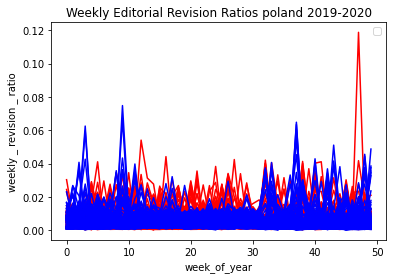

In [70]:
ax = plt.gca()
plt.plot(array_weekly_ratios_poland_2020, color='red') 

plt.plot(array_weekly_ratios_poland_2019, color='blue')




plt.title('Weekly Editorial Revision Ratios poland 2019-2020')
plt.ylabel('weekly _ revision _ ratio')
plt.xlabel('week_of_year')
plt.legend()

#plt.grid()
plt.show()

### Let's instantiate a dictionary to keep the correlations after evey step

In [71]:
earth_correlations={ }
jensen_correlations={ }

### earthmover and jensenshanon plots

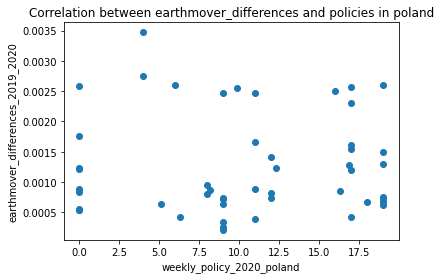

correlation and p_value are:  0.01432039204322669 0.9213730594911708


In [72]:
#earthmover   
    
#first we find the difference between array_weekly_ratios_poland_2019[i] and array_weekly_ratios_poland_2020[i]  
#and append this difference to a list

#dependent variable

ex1_earthmover_differences= []
for i in range(len(array_weekly_ratios_poland_2019)) :
    ex1_earthmover_differences.append(wasserstein_distance(array_weekly_ratios_poland_2019[i], array_weekly_ratios_poland_2020[i]))




plt.scatter(weekly_ratio_policy_2020_poland, ex1_earthmover_differences) 
plt.title('Correlation between earthmover_differences and policies in poland')
plt.xlabel('weekly_policy_2020_poland')
plt.ylabel('earthmover_differences_2019_2020')
plt.show()


corr, p_value=stats.pearsonr(ex1_earthmover_differences, weekly_ratio_policy_2020_poland)
print("correlation and p_value are: ", corr, p_value)

#save to dictionary

earth_correlations['ex1 : normalizedweekly_earth']=corr


In [73]:
print(earth_correlations)

{'ex1 : normalizedweekly_earth': 0.01432039204322669}


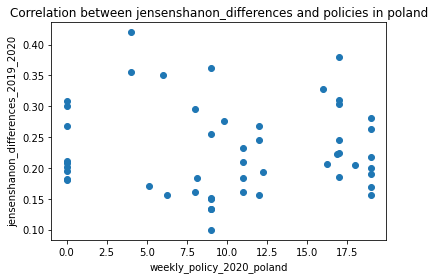

correlation and p_value are:  -0.026948276667038196 0.8526273933039186


In [74]:

#jensen shanon divergence

ex1_jensenshanon_differences= []
  

#print(extracted_daily_ratio_2020[1])


for i in range(len(array_weekly_ratios_poland_2019)) :
    ex1_jensenshanon_differences.append(distance.jensenshannon(array_weekly_ratios_poland_2019[i], array_weekly_ratios_poland_2020[i]))
    

plt.scatter(weekly_ratio_policy_2020_poland, ex1_jensenshanon_differences) 
plt.title('Correlation between jensenshanon_differences and policies in poland')
plt.xlabel('weekly_policy_2020_poland')
plt.ylabel('jensenshanon_differences_2019_2020')
plt.show()


corr, p_value=stats.pearsonr(ex1_jensenshanon_differences, weekly_ratio_policy_2020_poland)
print("correlation and p_value are: ", corr, p_value)

# save to dict

jensen_correlations['ex1 : normalizedweekly_jensen']=corr


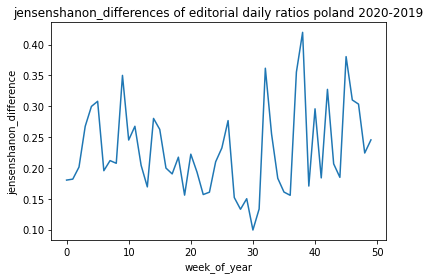

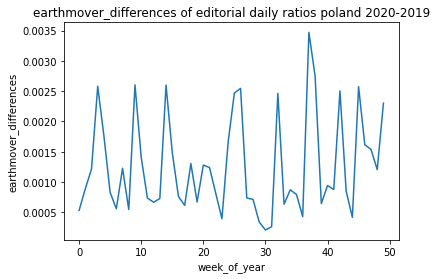

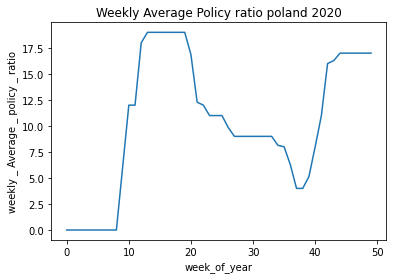

In [75]:

plt.plot(ex1_jensenshanon_differences) 
plt.title('jensenshanon_differences of editorial daily ratios poland 2020-2019')
plt.ylabel('jensenshanon_difference')
plt.xlabel('week_of_year')
plt.show()


plt.plot(ex1_earthmover_differences) 
plt.title('earthmover_differences of editorial daily ratios poland 2020-2019')
plt.ylabel('earthmover_differences')
plt.xlabel('week_of_year')
plt.show()


plt.plot(weekly_ratio_policy_2020_poland)
plt.title('Weekly Average Policy ratio poland 2020')
plt.ylabel('weekly _ Average _ policy _ ratio')
plt.xlabel('week_of_year')

plt.show()

## 00. Experiment 0: yearly normalized data

In [76]:
array_weekly_ratios_poland_2019_weeklyyearlynorm=np.zeros((50,168))
for i in range (50):
    
    
    array_weekly_ratios_poland_2019_weeklyyearlynorm[i]=array_weekly_events_poland_2019[i]/yearly_sum_2019_poland

    #array_weekly_ratios_poland_2019_weeklyyearlynorm[i]=array_weekly_ratios_poland_2019[i]/yearly_sum_2019_poland

    
array_weekly_ratios_poland_2020_weeklyyearlynorm=np.zeros((50,168))
for i in range (50):
    
    
    array_weekly_ratios_poland_2020_weeklyyearlynorm[i]=array_weekly_events_poland_2020[i]/yearly_sum_2020_poland
    #array_weekly_ratios_poland_2020_weeklyyearlynorm[i]=array_weekly_ratios_poland_2020[i]/yearly_sum_2020_poland


print(array_weekly_ratios_poland_2020_weeklyyearlynorm)

[[0.00000000e+00 0.00000000e+00 0.00000000e+00 ... 0.00000000e+00
  0.00000000e+00 0.00000000e+00]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 ... 0.00000000e+00
  0.00000000e+00 0.00000000e+00]
 [1.91829698e-04 3.14357792e-05 1.67895639e-05 ... 1.23956993e-04
  1.71825111e-04 1.21813644e-04]
 ...
 [6.85871546e-05 4.35814212e-05 2.17907106e-05 ... 6.69796432e-04
  6.87300445e-04 7.09091156e-04]
 [6.30501708e-04 6.17641616e-04 5.81204691e-04 ... 1.76826258e-04
  1.43604355e-04 1.10739677e-04]
 [1.22528094e-04 3.25074535e-05 1.46462153e-05 ... 1.92901372e-04
  1.62537267e-04 8.68056176e-05]]


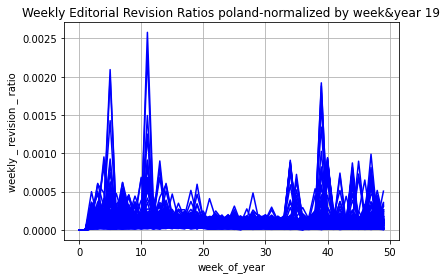

In [77]:
ax = plt.gca()

plt.plot(array_weekly_ratios_poland_2019_weeklyyearlynorm, color='blue') 
plt.title('Weekly Editorial Revision Ratios poland-normalized by week&year 19')
plt.ylabel('weekly _ revision _ ratio')
plt.grid()
plt.xlabel('week_of_year')
plt.show()

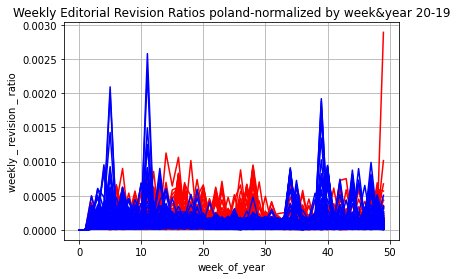

In [78]:
ax = plt.gca()

plt.plot(array_weekly_ratios_poland_2020_weeklyyearlynorm, color='red') 
plt.plot(array_weekly_ratios_poland_2019_weeklyyearlynorm, color='blue') 
plt.title('Weekly Editorial Revision Ratios poland-normalized by week&year 20-19')
plt.ylabel('weekly _ revision _ ratio')
plt.grid()
plt.xlabel('week_of_year')
plt.show()

/Users/luna/anaconda3/lib/python3.6/site-packages/scipy/spatial/distance.py:1288: RuntimeWarning: invalid value encountered in true_divide
  p = p / np.sum(p, axis=0)
/Users/luna/anaconda3/lib/python3.6/site-packages/scipy/spatial/distance.py:1289: RuntimeWarning: invalid value encountered in true_divide
  q = q / np.sum(q, axis=0)


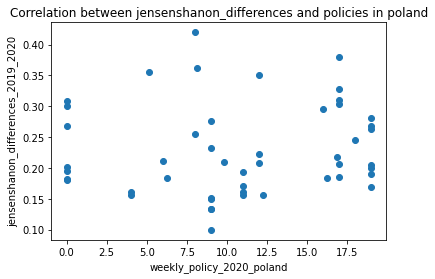

In [79]:
#jensen shanon divergence

ex0_jensenshanon_differences= []
  

#print(extracted_daily_ratio_2020[1])


for i in range(len(array_weekly_ratios_poland_2019)) :
    ex0_jensenshanon_differences.append(distance.jensenshannon(array_weekly_ratios_poland_2019_weeklyyearlynorm[i], array_weekly_ratios_poland_2020_weeklyyearlynorm[i]))
    

plt.scatter(weekly_ratio_policy_2020_poland, ex0_jensenshanon_differences) 
plt.title('Correlation between jensenshanon_differences and policies in poland')
plt.xlabel('weekly_policy_2020_poland')
plt.ylabel('jensenshanon_differences_2019_2020')
plt.show()

if "nan" or "inf" in ex0_jensenshanon_differences:
    corr, p_value = "nan", "nan"
    jensen_correlations['ex0 : normalizedyearly_earth']="nan"

else:

    corr, p_value=stats.pearsonr(ex0_jensenshanon_differences, PC1)

    print("correlation and p_value are: ", corr, p_value)
    jensen_correlations['ex0 : normalizedyearly_earth']=corr

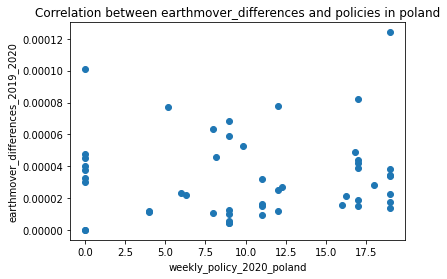

correlation and p_value are:  0.048086078870750136 0.740182434214153


In [80]:
#earthmover   
    
#first we find the difference between array_weekly_ratios_poland_2019[i] and array_weekly_ratios_poland_2020[i]  
#and append this difference to a list

#dependent variable

ex0_earthmover_differences= []
for i in range(len(array_weekly_ratios_poland_2019)) :
    ex0_earthmover_differences.append(wasserstein_distance(array_weekly_ratios_poland_2019_weeklyyearlynorm[i], array_weekly_ratios_poland_2020_weeklyyearlynorm[i]))



plt.scatter(weekly_ratio_policy_2020_poland, ex0_earthmover_differences) 
plt.title('Correlation between earthmover_differences and policies in poland')
plt.xlabel('weekly_policy_2020_poland')
plt.ylabel('earthmover_differences_2019_2020')
plt.show()



corr, p_value=stats.pearsonr(ex0_earthmover_differences, weekly_ratio_policy_2020_poland)
print("correlation and p_value are: ", corr, p_value)

earth_correlations['ex0 : normalizedyearly_earth']=corr

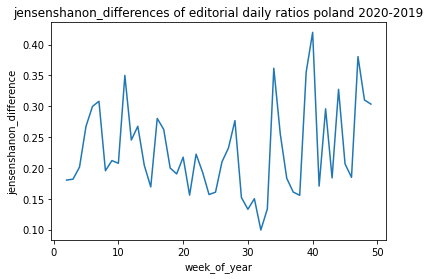

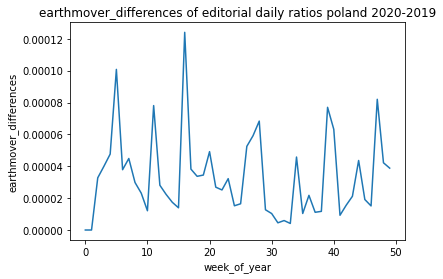

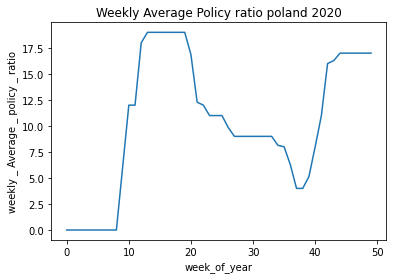

In [81]:
plt.plot(ex0_jensenshanon_differences) 
plt.title('jensenshanon_differences of editorial daily ratios poland 2020-2019')
plt.ylabel('jensenshanon_difference')
plt.xlabel('week_of_year')
plt.show()


plt.plot(ex0_earthmover_differences) 
plt.title('earthmover_differences of editorial daily ratios poland 2020-2019')
plt.ylabel('earthmover_differences')
plt.xlabel('week_of_year')
plt.show()


plt.plot(weekly_ratio_policy_2020_poland)
plt.title('Weekly Average Policy ratio poland 2020')
plt.ylabel('weekly _ Average _ policy _ ratio')
plt.xlabel('week_of_year')

plt.show()

## 3.2  EXPERIMENT 2: Weekly and yearly normalized data
### Normalize 2020 and 2019 ratios by yearly sum as well (yearly and weekly nomalization)


In [82]:

array_weekly_ratios_poland_2019_weeklyyearlynorm=np.zeros((50,168))
for i in range (50):
    
    
    #array_weekly_ratios_poland_2019_weeklyyearlynorm[i]=array_weekly_events_poland_2019[i]/yearly_sum_2019_poland

    array_weekly_ratios_poland_2019_weeklyyearlynorm[i]=array_weekly_ratios_poland_2019[i]/yearly_sum_2019_poland

    
array_weekly_ratios_poland_2020_weeklyyearlynorm=np.zeros((50,168))
for i in range (50):
    
    
    #array_weekly_ratios_poland_2020_weeklyyearlynorm[i]=array_weekly_events_poland_2020[i]/yearly_sum_2020_poland
    array_weekly_ratios_poland_2020_weeklyyearlynorm[i]=array_weekly_ratios_poland_2020[i]/yearly_sum_2020_poland


print(array_weekly_ratios_poland_2020_weeklyyearlynorm)



[[4.19942421e-09 6.88173800e-10 3.67547371e-10 ... 2.71359442e-09
  3.76149543e-09 2.66667348e-09]
 [4.28679296e-09 8.06268322e-10 4.94936990e-10 ... 3.03348478e-09
  2.37090784e-09 1.79614230e-09]
 [7.94900035e-10 5.71334400e-10 2.48406261e-10 ... 4.44647207e-09
  3.22928139e-09 1.99553030e-09]
 ...
 [1.79902646e-09 4.77292734e-10 2.15043979e-10 ... 2.83228655e-09
  2.38646367e-09 1.27452895e-09]
 [8.93620422e-10 5.75437393e-10 5.95746948e-10 ... 3.83850590e-09
  3.01258400e-09 1.73985188e-09]
 [1.28450511e-09 1.61147005e-09 6.69499633e-10 ... 2.31989408e-09
  2.28875456e-09 1.56476077e-09]]


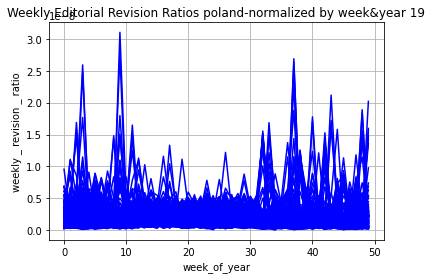

In [83]:
ax = plt.gca()

plt.plot(array_weekly_ratios_poland_2019_weeklyyearlynorm, color='blue') 
plt.title('Weekly Editorial Revision Ratios poland-normalized by week&year 19')
plt.ylabel('weekly _ revision _ ratio')
plt.grid()
plt.xlabel('week_of_year')
plt.show()

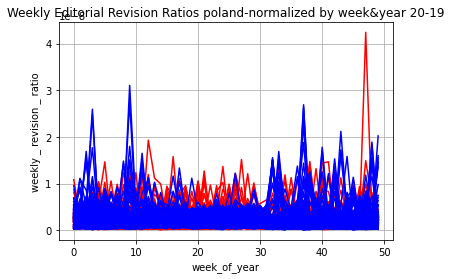

In [84]:
ax = plt.gca()

plt.plot(array_weekly_ratios_poland_2020_weeklyyearlynorm, color='red') 
plt.plot(array_weekly_ratios_poland_2019_weeklyyearlynorm, color='blue') 
plt.title('Weekly Editorial Revision Ratios poland-normalized by week&year 20-19')
plt.ylabel('weekly _ revision _ ratio')
plt.grid()
plt.xlabel('week_of_year')
plt.show()

## Plot x and y after yearly normalization

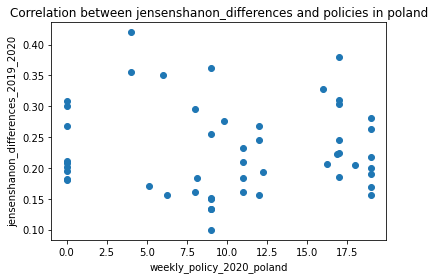

correlation and p_value are:  -0.026948276667038237 0.8526273933039158


In [85]:

#jensen shanon divergence

ex2_jensenshanon_differences= []
  

#print(extracted_daily_ratio_2020[1])


for i in range(len(array_weekly_ratios_poland_2019)) :
    ex2_jensenshanon_differences.append(distance.jensenshannon(array_weekly_ratios_poland_2019_weeklyyearlynorm[i], array_weekly_ratios_poland_2020_weeklyyearlynorm[i]))
    

plt.scatter(weekly_ratio_policy_2020_poland, ex2_jensenshanon_differences) 
plt.title('Correlation between jensenshanon_differences and policies in poland')
plt.xlabel('weekly_policy_2020_poland')
plt.ylabel('jensenshanon_differences_2019_2020')
plt.show()

corr, p_value=stats.pearsonr(ex2_jensenshanon_differences, weekly_ratio_policy_2020_poland)
print("correlation and p_value are: ", corr, p_value)
jensen_correlations['ex2 : normalizedyearlyweekly_jensen']=corr


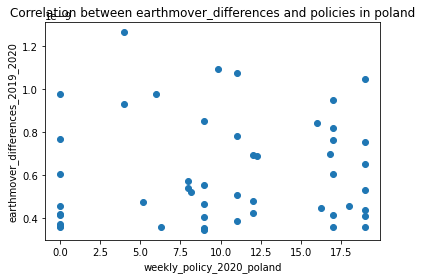

correlation and p_value are:  0.05065815902151055 0.7268103209843022


In [86]:
#earthmover   
    
#first we find the difference between array_weekly_ratios_poland_2019[i] and array_weekly_ratios_poland_2020[i]  
#and append this difference to a list

#dependent variable

ex2_earthmover_differences= []
for i in range(len(array_weekly_ratios_poland_2019)) :
    ex2_earthmover_differences.append(wasserstein_distance(array_weekly_ratios_poland_2019_weeklyyearlynorm[i], array_weekly_ratios_poland_2020_weeklyyearlynorm[i]))



plt.scatter(weekly_ratio_policy_2020_poland, ex2_earthmover_differences) 
plt.title('Correlation between earthmover_differences and policies in poland')
plt.xlabel('weekly_policy_2020_poland')
plt.ylabel('earthmover_differences_2019_2020')
plt.show()



corr, p_value=stats.pearsonr(ex2_earthmover_differences, weekly_ratio_policy_2020_poland)
print("correlation and p_value are: ", corr, p_value)

earth_correlations['ex2 : normalizedyearlyweekly_earth']=corr


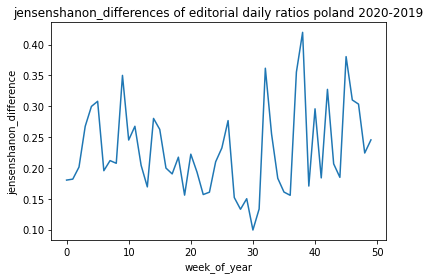

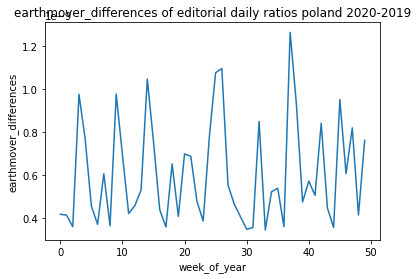

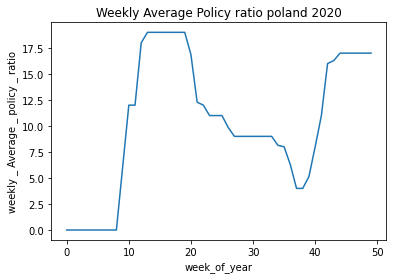

In [87]:




plt.plot(ex2_jensenshanon_differences) 
plt.title('jensenshanon_differences of editorial daily ratios poland 2020-2019')
plt.ylabel('jensenshanon_difference')
plt.xlabel('week_of_year')
plt.show()


plt.plot(ex2_earthmover_differences) 
plt.title('earthmover_differences of editorial daily ratios poland 2020-2019')
plt.ylabel('earthmover_differences')
plt.xlabel('week_of_year')
plt.show()


plt.plot(weekly_ratio_policy_2020_poland)
plt.title('Weekly Average Policy ratio poland 2020')
plt.ylabel('weekly _ Average _ policy _ ratio')
plt.xlabel('week_of_year')

plt.show()


## 3.3 Outlier detection
### let's first look at the 168 values from the week 20th

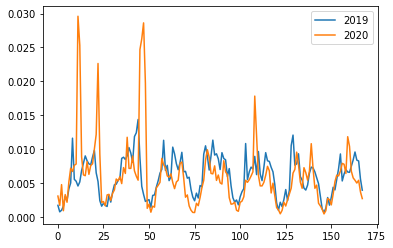

In [88]:
plt.plot(array_weekly_ratios_poland_2019[20], label='2019' )

plt.plot(array_weekly_ratios_poland_2020[20], label='2020' )

plt.legend()

plt.show()

In [89]:
print(ex2_earthmover_differences[20])

6.989447807738186e-10


## let's look at the 168 values from the week 11th

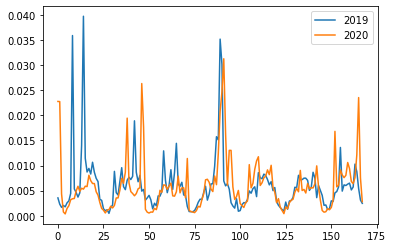

In [90]:
# Week 11 th 
plt.plot(array_weekly_ratios_poland_2019[11],label='2019' )

plt.plot(array_weekly_ratios_poland_2020[11], label='2020' )

plt.legend()

plt.show()

In [91]:
print(array_weekly_ratios_poland_2019[11])

[0.00354954 0.00230537 0.00166499 0.00204922 0.00177477 0.00256152
 0.00294575 0.00444607 0.03587961 0.0053426  0.00462904 0.00371421
 0.00455585 0.01401519 0.03972189 0.01145366 0.00870918 0.00942274
 0.00830665 0.01064861 0.00865429 0.00744671 0.00680633 0.00325679
 0.00307383 0.00139054 0.00100631 0.00118928 0.00047571 0.00164669
 0.0021407  0.00883725 0.00459244 0.00413503 0.00684292 0.00956912
 0.00580002 0.00519623 0.00708078 0.00766627 0.00720886 0.00784924
 0.01890038 0.00867258 0.00676974 0.0080505  0.00490349 0.00523282
 0.00311042 0.00354954 0.00406184 0.00316531 0.00137224 0.00248834
 0.00197603 0.00395206 0.00389717 0.004812   0.01291739 0.00706248
 0.00459244 0.00609276 0.00916659 0.00525112 0.00870918 0.01441771
 0.00631232 0.00583661 0.00665996 0.00413503 0.00408014 0.00184796
 0.00084164 0.00080505 0.00080505 0.00104291 0.00173818 0.0026896
 0.00329339 0.0032385  0.00466563 0.0058732  0.00311042 0.0042997
 0.00633062 0.00638551 0.00986186 0.01573507 0.01511298 0.035166

## 3.3.1 EXPERIMENT 3: Outlier detection & removal  for 2019 [ for weekly normalized data ]

Let's try first to remove one example: the largest 2019 jump which takes place a bit after the 10th week

In [92]:

# LET'S find the maximum value of the 11th array
test_outlier=np.max(array_weekly_ratios_poland_2019[11])
print("test_outlier is:  ", np.max(array_weekly_ratios_poland_2019[11]))

test_outlier is:   0.03972189186716677


In [93]:
# get index position of the above maximum value 

np.where(array_weekly_ratios_poland_2019[11] == test_outlier)

(array([14]),)

In [94]:
#get the exact index
print(np.where(array_weekly_ratios_poland_2019[11] == test_outlier)[0][0])

14


In [95]:
# let s see elements before and after the the outlier because we wanto susbsutitue the outlier by average of its before and after)
print(array_weekly_ratios_poland_2019[11][90:94])

[0.03015278 0.00693441 0.00594639 0.00638551]


In [96]:

# see  the average of before and after the max element 
array_weekly_ratios_poland_2019[11][92]=(array_weekly_ratios_poland_2019[11][90]+array_weekly_ratios_poland_2019[11][91])/2


print(array_weekly_ratios_poland_2019[11][90:94])

[0.03015278 0.00693441 0.01854359 0.00638551]


## A

## Before outlier removal as we also looked at it above 

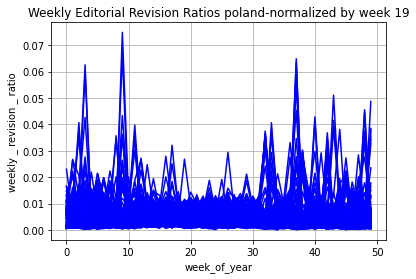

In [97]:
ax = plt.gca()

plt.plot(array_weekly_ratios_poland_2019, color='blue') 
plt.title('Weekly Editorial Revision Ratios poland-normalized by week 19')
plt.ylabel('weekly _ revision _ ratio')
plt.grid()
plt.xlabel('week_of_year')
plt.show()

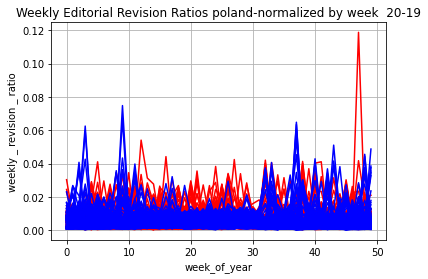

In [98]:
ax = plt.gca()

plt.plot(array_weekly_ratios_poland_2020, color='red') 
plt.plot(array_weekly_ratios_poland_2019, color='blue') 
plt.title('Weekly Editorial Revision Ratios poland-normalized by week  20-19')
plt.ylabel('weekly _ revision _ ratio')
plt.grid()
plt.xlabel('week_of_year')
plt.show()

In [99]:
array_weekly_ratios_poland_2019.shape

(50, 168)

### remove outliers 10 times from every array in 50 weekly arrays for 2019 

In [100]:
#without_outlier_array_weekly_ratios_poland_2019=np.zeros((50,168))

for j in range (10): #remove outlier n times  and plot after every time removed  - repeat outlier removal n times
    
    for i in range (50):
    
    
        maxvalue=np.max(array_weekly_ratios_poland_2019[i])
        getindex=np.where(array_weekly_ratios_poland_2019[i]== maxvalue)[0][0]
        if getindex+1 <168:
            array_weekly_ratios_poland_2019[i][getindex]=(array_weekly_ratios_poland_2019[i][getindex-1]+array_weekly_ratios_poland_2019[i][getindex+1])/2
      

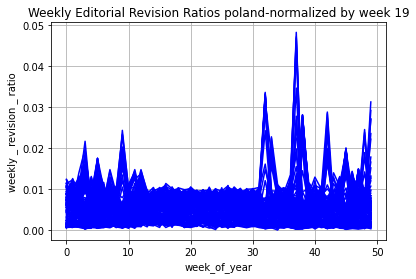

In [101]:
ax = plt.gca()
plt.plot(array_weekly_ratios_poland_2019, color='blue') 
plt.title('Weekly Editorial Revision Ratios poland-normalized by week 19')
plt.ylabel('weekly _ revision _ ratio')
plt.grid()
plt.xlabel('week_of_year')
plt.show()  

#  After outliers removed

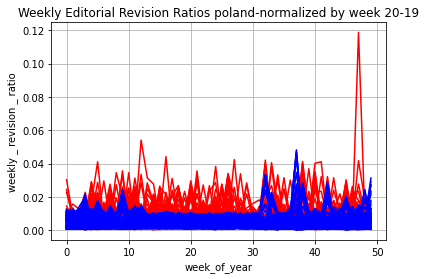

In [102]:
ax = plt.gca()
plt.plot(array_weekly_ratios_poland_2020, color='red') 
plt.plot(array_weekly_ratios_poland_2019, color='blue') 
plt.title('Weekly Editorial Revision Ratios poland-normalized by week 20-19')
plt.ylabel('weekly _ revision _ ratio')
plt.grid()
plt.xlabel('week_of_year')
plt.show()  

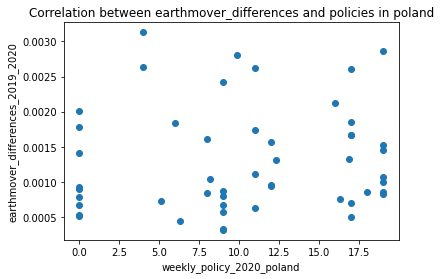

correlation and p_value are:  0.0888845796977169 0.5393283479848319


In [103]:
#earthmover   
    
#first we find the difference between array_weekly_ratios_poland_2019[i] and array_weekly_ratios_poland_2020[i]  
#and append this difference to a list

#dependent variable

ex3_earthmover_differences= []
for i in range(len(array_weekly_ratios_poland_2019)) :
    ex3_earthmover_differences.append(wasserstein_distance(array_weekly_ratios_poland_2019[i], array_weekly_ratios_poland_2020[i]))




plt.scatter(weekly_ratio_policy_2020_poland, ex3_earthmover_differences) 
plt.title('Correlation between earthmover_differences and policies in poland')
plt.xlabel('weekly_policy_2020_poland')
plt.ylabel('earthmover_differences_2019_2020')
plt.show()

corr, p_value=stats.pearsonr(ex3_earthmover_differences, weekly_ratio_policy_2020_poland)
print("correlation and p_value are: ", corr, p_value)


earth_correlations['ex3 : without_outlier10_earth']=corr



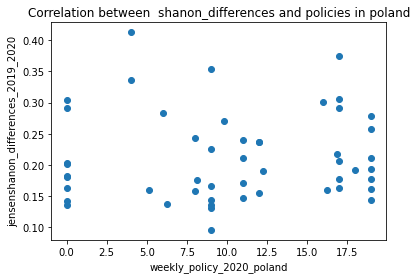

correlation and p_value are:  0.03547449819451515 0.8067855341148295


In [104]:

#jensen shanon divergence

ex3_jensenshanon_differences= []

#print(extracted_daily_ratio_2020[1])


for i in range(len(array_weekly_ratios_poland_2019)) :
    ex3_jensenshanon_differences.append(distance.jensenshannon(array_weekly_ratios_poland_2019[i], array_weekly_ratios_poland_2020[i]))
    
plt.scatter(weekly_ratio_policy_2020_poland, ex3_jensenshanon_differences) 

plt.title('Correlation between  shanon_differences and policies in poland')
plt.xlabel('weekly_policy_2020_poland')
plt.ylabel('jensenshanon_differences_2019_2020')
plt.show()

corr, p_value=stats.pearsonr(ex3_jensenshanon_differences, weekly_ratio_policy_2020_poland)
print("correlation and p_value are: ", corr, p_value)

jensen_correlations['ex3 : without_outlier10_jensen']=corr



In [105]:
print(ex3_jensenshanon_differences)

[0.1635718196621807, 0.14143020421205102, 0.13563414981414162, 0.20382722105540266, 0.2917322352141313, 0.3036738366220667, 0.18250074225033713, 0.20092403139145004, 0.1808172314142504, 0.2837086211636023, 0.23638981629172556, 0.23632003441998053, 0.1921162378653651, 0.1607168421762547, 0.278208649223913, 0.2583379754737134, 0.1941280059966851, 0.17714479557011367, 0.21152074976230412, 0.14388366240165024, 0.21776534469919775, 0.19059142544942273, 0.15518288132837715, 0.146644965882114, 0.21066992777669824, 0.2397270738438389, 0.27034702605959965, 0.16544952225627926, 0.14374112634162145, 0.13592775750594646, 0.09555113692261727, 0.13043808440808255, 0.3541713940342606, 0.22566730407788535, 0.1760256154655144, 0.15751496392411538, 0.1370587898940452, 0.3355239212296454, 0.41277019432721646, 0.1592856072475768, 0.2431013613877953, 0.17116753836797666, 0.3002961082485963, 0.15972596888925278, 0.1635129623264207, 0.3750740622488274, 0.3060434295706958, 0.291244075405223, 0.177650905207764

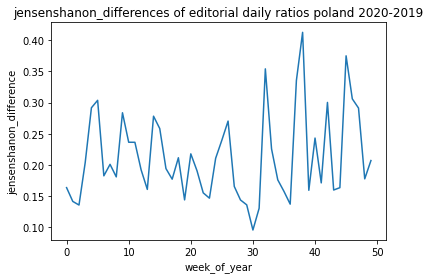

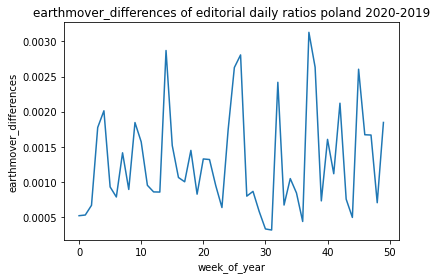

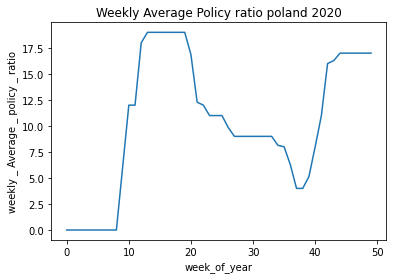

In [106]:


plt.plot(ex3_jensenshanon_differences) 
plt.title('jensenshanon_differences of editorial daily ratios poland 2020-2019')
plt.ylabel('jensenshanon_difference')
plt.xlabel('week_of_year')
plt.show()


plt.plot(ex3_earthmover_differences) 
plt.title('earthmover_differences of editorial daily ratios poland 2020-2019')
plt.ylabel('earthmover_differences')
plt.xlabel('week_of_year')
plt.show()


plt.plot(weekly_ratio_policy_2020_poland)
plt.title('Weekly Average Policy ratio poland 2020')
plt.ylabel('weekly _ Average _ policy _ ratio')
plt.xlabel('week_of_year')

plt.show()

In [107]:
print(len(array_weekly_events_poland_2019[2:]))

50


## 3.3.2 EXPERIMENT 4: Outlier detection & removal  for 2019 [for weekly&yearly normalized data]



### Before outlier removed  : let's look at the original plot

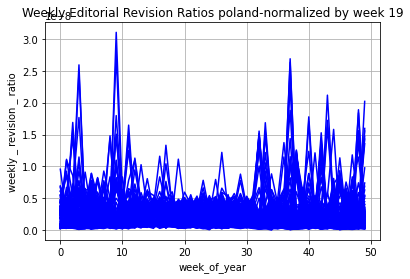

In [108]:
ax = plt.gca()

plt.plot(array_weekly_ratios_poland_2019_weeklyyearlynorm, color='blue') 
plt.title('Weekly Editorial Revision Ratios poland-normalized by week 19')
plt.ylabel('weekly _ revision _ ratio')
plt.grid()
plt.xlabel('week_of_year')
plt.show()

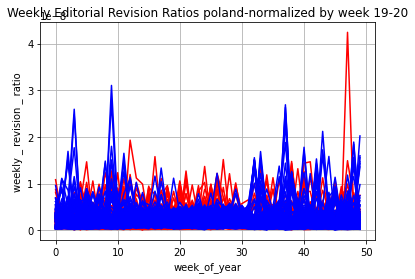

In [109]:
ax = plt.gca()

plt.plot(array_weekly_ratios_poland_2020_weeklyyearlynorm, color='red') 
plt.plot(array_weekly_ratios_poland_2019_weeklyyearlynorm, color='blue')


plt.title('Weekly Editorial Revision Ratios poland-normalized by week 19-20')
plt.ylabel('weekly _ revision _ ratio')
plt.grid()
plt.xlabel('week_of_year')
plt.show()


### After outlier removal
### Let's remove the outliers from yearly_weekly_normalized data and find the correaltion again

In [110]:
#without_outlier_array_weekly_ratios_poland_2019=np.zeros((50,168))



for j in range (10): #remove outlier n times  and plot after every time removed  - repeat outlier removal n times
    
    for i in range (50):
    
    
        maxvalue=np.max(array_weekly_ratios_poland_2019_weeklyyearlynorm[i])
        getindex=np.where(array_weekly_ratios_poland_2019_weeklyyearlynorm[i]== maxvalue)[0][0]
        if getindex+1 <168:
            array_weekly_ratios_poland_2019_weeklyyearlynorm[i][getindex]=(array_weekly_ratios_poland_2019_weeklyyearlynorm[i][getindex-1]+array_weekly_ratios_poland_2019_weeklyyearlynorm[i][getindex+1])/2
      
   

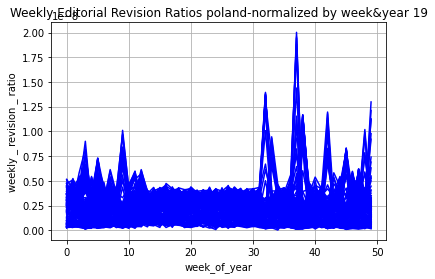

In [111]:
plt.plot(array_weekly_ratios_poland_2019_weeklyyearlynorm, color='blue') 
plt.title('Weekly Editorial Revision Ratios poland-normalized by week&year 19')
plt.ylabel('weekly _ revision _ ratio')
plt.grid()
plt.xlabel('week_of_year')
plt.show()  

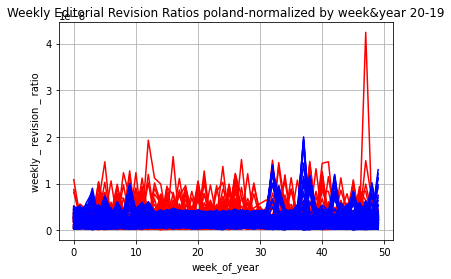

In [112]:
plt.plot(array_weekly_ratios_poland_2020_weeklyyearlynorm, color='red')
plt.plot(array_weekly_ratios_poland_2019_weeklyyearlynorm, color='blue') 
plt.title('Weekly Editorial Revision Ratios poland-normalized by week&year 20-19')
plt.ylabel('weekly _ revision _ ratio')
plt.grid()
plt.xlabel('week_of_year')
plt.show()  

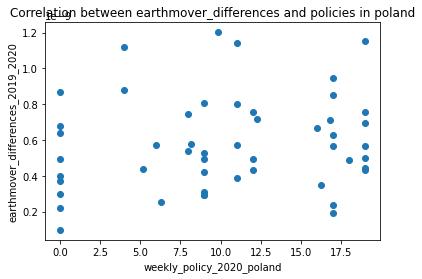

correlation and p_value are:  0.1540511842915197 0.285454304311252


In [113]:
#earthmover   
    
#first we find the difference between array_weekly_ratios_poland_2019[i] and array_weekly_ratios_poland_2020[i]  
#and append this difference to a list

#dependent variable

ex4_earthmover_differences= []
for i in range(len(array_weekly_ratios_poland_2019)) :
    ex4_earthmover_differences.append(wasserstein_distance(array_weekly_ratios_poland_2019_weeklyyearlynorm[i], array_weekly_ratios_poland_2020_weeklyyearlynorm[i]))


plt.scatter(weekly_ratio_policy_2020_poland, ex4_earthmover_differences) 
plt.title('Correlation between earthmover_differences and policies in poland')
plt.xlabel('weekly_policy_2020_poland')
plt.ylabel('earthmover_differences_2019_2020')
plt.show()

corr, p_value=stats.pearsonr(ex4_earthmover_differences, weekly_ratio_policy_2020_poland)
print("correlation and p_value are: ", corr, p_value)


earth_correlations['ex4 : normalizedyearlyweekly_without_outlier10_earth']=corr



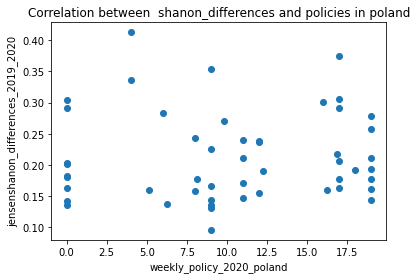

correlation and p_value are:  0.035543313680389405 0.8064179282300988


In [114]:

#jensen shanon divergence

ex4_jensenshanon_differences= []

#print(extracted_daily_ratio_2020[1])


for i in range(len(array_weekly_ratios_poland_2019)) :
    ex4_jensenshanon_differences.append(distance.jensenshannon(array_weekly_ratios_poland_2019_weeklyyearlynorm[i], array_weekly_ratios_poland_2020_weeklyyearlynorm[i]))
    
plt.scatter(weekly_ratio_policy_2020_poland, ex4_jensenshanon_differences) 

plt.title('Correlation between  shanon_differences and policies in poland')
plt.xlabel('weekly_policy_2020_poland')
plt.ylabel('jensenshanon_differences_2019_2020')
plt.show()


corr, p_value=stats.pearsonr(ex4_jensenshanon_differences, weekly_ratio_policy_2020_poland)
print("correlation and p_value are: ", corr, p_value)
jensen_correlations['ex4 : normalizedyearlyweekly_without_outlier10_jensen']=corr



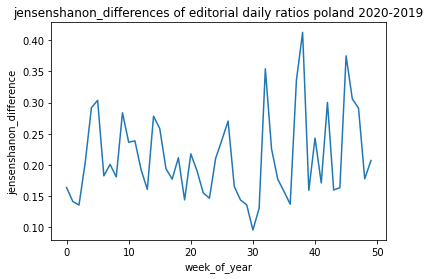

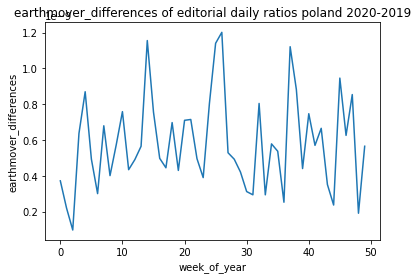

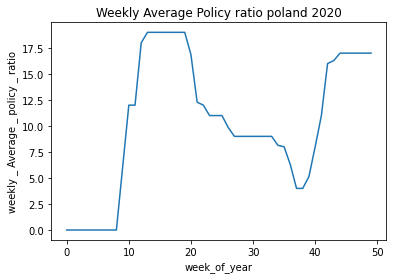

In [115]:


plt.plot(ex4_jensenshanon_differences) 
plt.title('jensenshanon_differences of editorial daily ratios poland 2020-2019')
plt.ylabel('jensenshanon_difference')
plt.xlabel('week_of_year')
plt.show()


plt.plot(ex4_earthmover_differences) 
plt.title('earthmover_differences of editorial daily ratios poland 2020-2019')
plt.ylabel('earthmover_differences')
plt.xlabel('week_of_year')
plt.show()


plt.plot(weekly_ratio_policy_2020_poland)
plt.title('Weekly Average Policy ratio poland 2020')
plt.ylabel('weekly _ Average _ policy _ ratio')
plt.xlabel('week_of_year')

plt.show()

## 3.4  EXPERIMENT 5: Smoothing 2019/2020 by moving average  
Test with window size 3 days

https://www.kite.com/python/answers/how-to-find-the-moving-average-of-a-list-in-python

### 2019

In [116]:
# We have 168 values - the window size is 72 = 3 days 
# --> each point in array of size 168 is replace by the average of 72 points around it

array_weekly_events_poland_2019_50=array_weekly_events_poland_2019[2:]


moving_average_weekly_ratios_poland_2019=np.zeros((50,97))


for i in range (50):
            
        
    numbers = array_weekly_events_poland_2019_50[i]
    window_size = 72



    j = 0
    moving_averages = []
    while j< 168 - window_size + 1:
            this_window = array_weekly_events_poland_2019_50[i][j : j + window_size]


            window_average = sum(this_window) / window_size
            moving_averages.append(window_average)
            j += 1

    moving_average_weekly_ratios_poland_2019[i]= np.asarray(moving_averages)

        

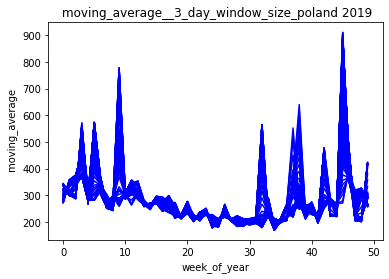

In [117]:
ax = plt.gca()
#plt.plot(array_weekly_events_poland_2020_50) 
plt.plot( moving_average_weekly_ratios_poland_2019, color='blue') 

plt.title(' moving_average__3_day_window_size_poland 2019')
plt.ylabel(' moving_average')
plt.xlabel('week_of_year')
plt.show()

### 2020

In [118]:
# Moving average of 2020 -not ntcessary to smoothen 2020 so we dont run this cell

array_weekly_events_poland_2020_50=array_weekly_events_poland_2020[2:]

moving_average_weekly_ratios_poland_2020=np.zeros((50,97))

for i in range (50):
            
        
    numbers = array_weekly_events_poland_2020_50[i]
    window_size = 72



    j = 0
    moving_averages = []
    while j< 168 - window_size + 1:
            this_window = array_weekly_events_poland_2020_50[i][j : j + window_size]

            window_average = sum(this_window) / window_size
            moving_averages.append(window_average)
            j += 1

    moving_average_weekly_ratios_poland_2020[i]= np.asarray(moving_averages)

         

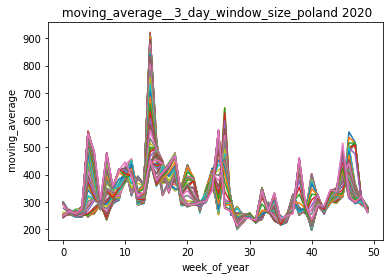

In [119]:
 
ax = plt.gca()
plt.plot( moving_average_weekly_ratios_poland_2020) 
plt.title(' moving_average__3_day_window_size_poland 2020')
plt.ylabel(' moving_average')
plt.xlabel('week_of_year')
plt.show()


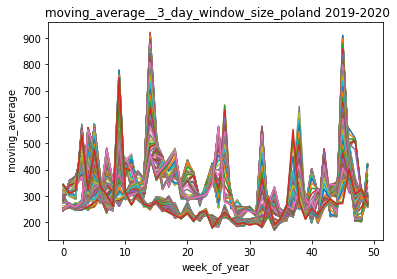

In [120]:

ax = plt.gca()
plt.plot( moving_average_weekly_ratios_poland_2020) 
plt.plot( moving_average_weekly_ratios_poland_2019) 

plt.title(' moving_average__3_day_window_size_poland 2019-2020')
plt.ylabel(' moving_average')
plt.xlabel('week_of_year')

plt.show()


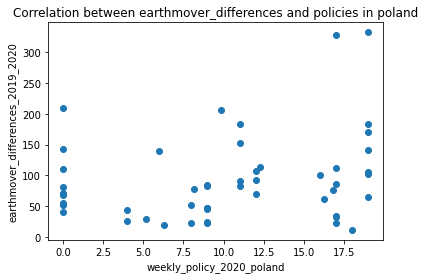

correlation and p_value are:  0.23837596398301522 0.0955009874269093


In [121]:
#earthmover   
    
#first we find the difference between array_weekly_ratios_poland_2019[i] and array_weekly_ratios_poland_2020[i]  
#and append this difference to a list

#dependent variable

ex5_earthmover_differences= []
for i in range(len(array_weekly_ratios_poland_2019)) :
    ex5_earthmover_differences.append(wasserstein_distance(moving_average_weekly_ratios_poland_2019[i], moving_average_weekly_ratios_poland_2020[i]))


plt.scatter(weekly_ratio_policy_2020_poland, ex5_earthmover_differences) 
plt.title('Correlation between earthmover_differences and policies in poland')
plt.xlabel('weekly_policy_2020_poland')
plt.ylabel('earthmover_differences_2019_2020')
plt.show()

corr, p_value=stats.pearsonr(ex5_earthmover_differences, weekly_ratio_policy_2020_poland)
print("correlation and p_value are: ", corr, p_value)


earth_correlations['ex5 : movingAverage_originalvalues_earth']=corr




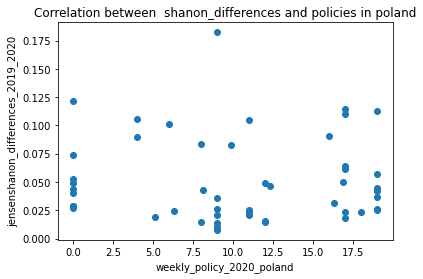

correlation and p_value are:  -0.026034235358545876 0.857573364624419


In [122]:

#jensen shanon divergence

ex5_jensenshanon_differences= []

#print(extracted_daily_ratio_2020[1])


for i in range(len(array_weekly_ratios_poland_2019)) :
    ex5_jensenshanon_differences.append(distance.jensenshannon(moving_average_weekly_ratios_poland_2019[i], moving_average_weekly_ratios_poland_2020[i]))
    
plt.scatter(weekly_ratio_policy_2020_poland, ex5_jensenshanon_differences) 

plt.title('Correlation between  shanon_differences and policies in poland')
plt.xlabel('weekly_policy_2020_poland')
plt.ylabel('jensenshanon_differences_2019_2020')
plt.show()


corr, p_value=stats.pearsonr(ex5_jensenshanon_differences, weekly_ratio_policy_2020_poland)
print("correlation and p_value are: ", corr, p_value)
jensen_correlations['ex5 : movingAverage_originalvalues_jensesn']=corr



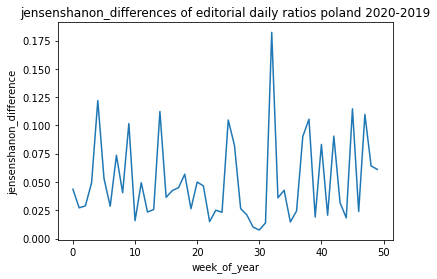

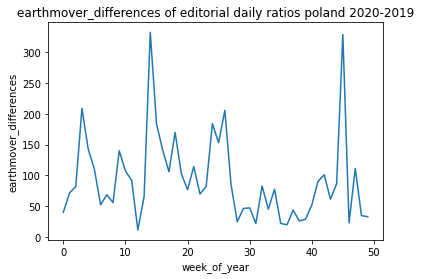

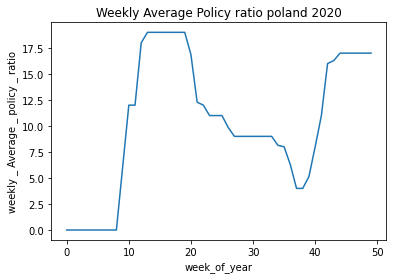

In [123]:


plt.plot(ex5_jensenshanon_differences) 
plt.title('jensenshanon_differences of editorial daily ratios poland 2020-2019')
plt.ylabel('jensenshanon_difference')
plt.xlabel('week_of_year')
plt.show()


plt.plot(ex5_earthmover_differences) 
plt.title('earthmover_differences of editorial daily ratios poland 2020-2019')
plt.ylabel('earthmover_differences')
plt.xlabel('week_of_year')
plt.show()


plt.plot(weekly_ratio_policy_2020_poland)
plt.title('Weekly Average Policy ratio poland 2020')
plt.ylabel('weekly _ Average _ policy _ ratio')
plt.xlabel('week_of_year')

plt.show()

### 3.4 Testing other measures of difference: Kullback-Leiber divergence

In [124]:
"""
def kl_divergence(p, q):
    return np.sum(np.where(p != 0, p * np.log(p / q), 0))

kl_differences= []

#print(extracted_daily_ratio_2020[1])


for i in range(len(array_weekly_ratios_poland_2019)) :
    kl_differences.append(kl_divergence(array_weekly_ratios_poland_2019[i], array_weekly_ratios_poland_2020[i]))
    

plt.scatter(weekly_ratio_policy_2020_poland, kl_differences) 
plt.title('Correlation between Kullback_Leiber_differences and policies in poland')
plt.xlabel('weekly_policy_2020_poland')
plt.ylabel('Kullback_Leiber_differences_2019_2020')
plt.show()



corr, p_value=stats.pearsonr(kl_differences, weekly_ratio_policy_2020_poland)
print("correlation and p_value are: ", corr, p_value)
"""


'\ndef kl_divergence(p, q):\n    return np.sum(np.where(p != 0, p * np.log(p / q), 0))\n\nkl_differences= []\n\n#print(extracted_daily_ratio_2020[1])\n\n\nfor i in range(len(array_weekly_ratios_poland_2019)) :\n    kl_differences.append(kl_divergence(array_weekly_ratios_poland_2019[i], array_weekly_ratios_poland_2020[i]))\n    \n\nplt.scatter(weekly_ratio_policy_2020_poland, kl_differences) \nplt.title(\'Correlation between Kullback_Leiber_differences and policies in poland\')\nplt.xlabel(\'weekly_policy_2020_poland\')\nplt.ylabel(\'Kullback_Leiber_differences_2019_2020\')\nplt.show()\n\n\n\ncorr, p_value=stats.pearsonr(kl_differences, weekly_ratio_policy_2020_poland)\nprint("correlation and p_value are: ", corr, p_value)\n'

## 3.5 Feature importance - feature selection - dimensionality reduction
#### Which policy indicators have the highest correlation with the editorial data?
### Let's first find out which experiments in each categories (earthmover & jensenshanon) gave the highest values:

In [126]:
max_key = max(earth_correlations, key=earth_correlations.get)
print(max_key, ' : ', earth_correlations[max_key])

#max_key = max(jensen_correlations, key=jensen_correlations.get)
#print(max_key, ' : ', jensen_correlations[max_key])

ex5 : movingAverage_originalvalues_earth  :  0.23837596398301522


In [127]:

# make up a new dataset consisting of IV and DV - add the earthmover as a column to the policy data set  


edit_and_policy= weekly_policy_2020_poland_indicators_ratio
edit_and_policy['jensenshanon_differences']=ex4_jensenshanon_differences
edit_and_policy['earthmover_differences']=ex5_earthmover_differences


edit_and_policy.head(10)


,weekly_school,weekly_workplace,weekly_events,weekly_gatherings,weekly_transportation,weekly_home,weekly_movement,weekly_travel,weekly_sum,jensenshanon_differences,earthmover_differences
week_of_year,,,,,,,,,,,
2,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.0,0.163572,39.776632
3,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.0,0.141430,71.296964
4,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.0,0.135634,81.573454
5,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.0,0.203827,208.821163
6,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.0,0.291732,143.113975
7,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.0,0.303674,109.796964
8,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.0,0.182501,52.064290
9,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.0,0.200924,68.329181
10,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.0,0.180817,55.547680


## 3.5.1  Correlation Heatmap

In [128]:
corr = edit_and_policy.corr()
corr.style.background_gradient(cmap ='coolwarm')


,weekly_school,weekly_workplace,weekly_events,weekly_gatherings,weekly_transportation,weekly_home,weekly_movement,weekly_travel,weekly_sum,jensenshanon_differences,earthmover_differences
weekly_school,1.000000,0.844273,0.796044,0.788588,0.646737,0.683191,0.712638,0.851210,0.946891,0.068136,0.217116
weekly_workplace,0.844273,1.000000,0.523629,0.702964,0.576120,0.460002,0.474123,0.784534,0.818856,-0.115395,0.149273
weekly_events,0.796044,0.523629,1.000000,0.697821,0.738598,0.802411,0.843537,0.585641,0.851816,0.161649,0.307099
weekly_gatherings,0.788588,0.702964,0.697821,1.000000,0.757655,0.814420,0.690870,0.664687,0.907979,-0.033345,0.194363
weekly_transportation,0.646737,0.576120,0.738598,0.757655,1.000000,0.644623,0.609304,0.498439,0.773881,0.079624,0.396129
weekly_home,0.683191,0.460002,0.802411,0.814420,0.644623,1.000000,0.875603,0.449540,0.809580,0.083266,0.178471
weekly_movement,0.712638,0.474123,0.843537,0.690870,0.609304,0.875603,1.000000,0.547446,0.814452,0.072426,0.297266
weekly_travel,0.851210,0.784534,0.585641,0.664687,0.498439,0.449540,0.547446,1.000000,0.836851,0.022939,0.065109
weekly_sum,0.946891,0.818856,0.851816,0.907979,0.773881,0.809580,0.814452,0.836851,1.000000,0.035543,0.238376
jensenshanon_differences,0.068136,-0.115395,0.161649,-0.033345,0.079624,0.083266,0.072426,0.022939,0.035543,1.000000,0.390880


In [129]:
df_final=weekly_policy_2020_poland_indicators_ratio.iloc[:,:8]
df_final.head()

,weekly_school,weekly_workplace,weekly_events,weekly_gatherings,weekly_transportation,weekly_home,weekly_movement,weekly_travel
week_of_year,,,,,,,,
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


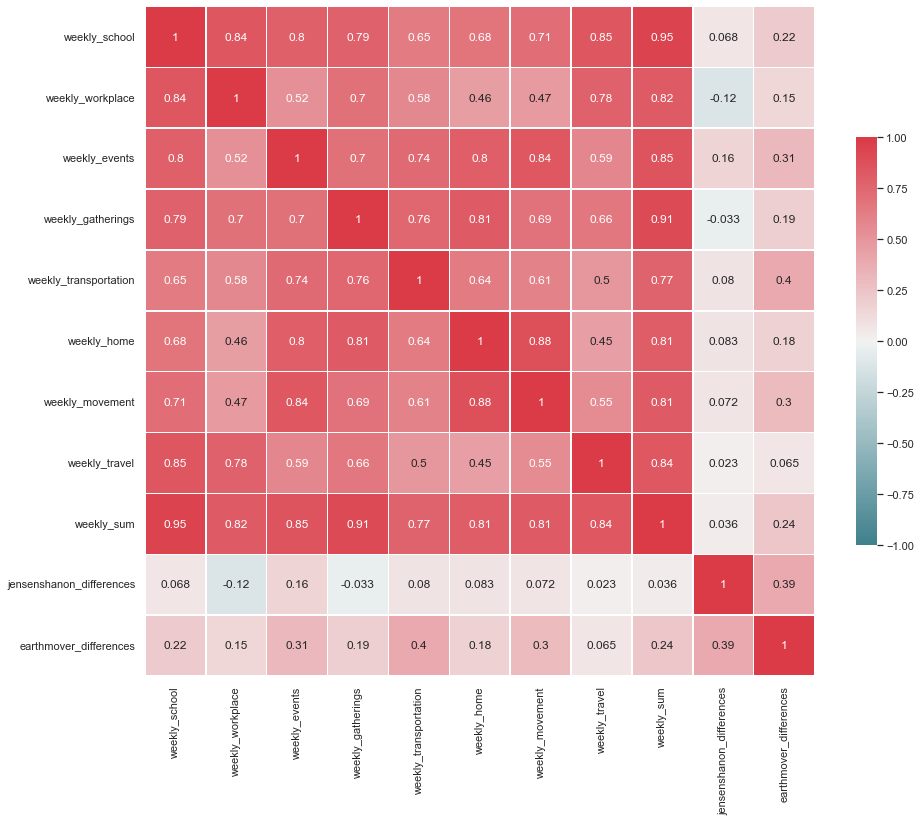

In [130]:
sns.set_theme(style="white")

# Generate a mask for the upper triangle
#mask = np.triu(np.ones_like(corr, dtype=bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(15, 15))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(210, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, cmap=cmap, vmax=1, vmin=-1, annot=True, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})
plt.show()

## Pairwise correlations larger than 0.75

In [131]:
correlated_features = set()
dict_correlated_features = {}

correlation_matrix = corr  # let's drop the target value

for i in range(len(correlation_matrix.columns)):
    for j in range(i):
        if abs(correlation_matrix.iloc[i, j]) > 0.75: #threshhold is 0.8 or can be lower
            colname = correlation_matrix.columns[i]
            correlated_features.add(colname)
            
            dict_correlated_features[correlation_matrix.columns[i]]=correlation_matrix.columns[j]
            

In [132]:
print( "These questions highly correlated with each other ")
correlated_features
dict_correlated_features

These questions highly correlated with each other 


{'weekly_events': 'weekly_school',
 'weekly_gatherings': 'weekly_school',
 'weekly_home': 'weekly_gatherings',
 'weekly_movement': 'weekly_home',
 'weekly_sum': 'weekly_travel',
 'weekly_transportation': 'weekly_gatherings',
 'weekly_travel': 'weekly_workplace',
 'weekly_workplace': 'weekly_school'}

In [133]:

# Displaying the dictionary 
for key, value in dict_correlated_features.items(): 
    
    question1= key 
    question2= value 
    
    print('Q: {}, Q: {}'.format(question1, question2)) 


Q: weekly_workplace, Q: weekly_school
Q: weekly_events, Q: weekly_school
Q: weekly_gatherings, Q: weekly_school
Q: weekly_transportation, Q: weekly_gatherings
Q: weekly_home, Q: weekly_gatherings
Q: weekly_movement, Q: weekly_home
Q: weekly_travel, Q: weekly_workplace
Q: weekly_sum, Q: weekly_travel


## Jensen shanon correaltions plot

In [134]:


label_correlation = corr.sort_values(by='jensenshanon_differences', ascending=False)[['jensenshanon_differences']]
label_correlation = label_correlation.reset_index()
label_correlation.columns = ['Attribute', 'CorrelationWithjensenshanondifferences']
label_correlation = label_correlation.iloc[1: , :]
label_correlation = label_correlation.reset_index()
label_correlation.head()


,index,Attribute,CorrelationWithjensenshanondifferences
0,1,earthmover_differences,0.390880
1,2,weekly_events,0.161649
2,3,weekly_home,0.083266
3,4,weekly_transportation,0.079624
4,5,weekly_movement,0.072426


In [135]:


label_correlation['color']='NAN' # create new column

for i in range (label_correlation.shape[0]):
    
    #label_correlation.questions[i]= str(label_correlation.Attribute[i])+": "+questions_dict[label_correlation.Attribute[i]]
    
    if (label_correlation.CorrelationWithjensenshanondifferences[i]<0):
        label_correlation.color[i] = "red"
    else:
        label_correlation.color[i] = "blue"

    

print(label_correlation.nlargest(10,'CorrelationWithjensenshanondifferences'))  #print 10 best features 



   index               Attribute  CorrelationWithjensenshanondifferences color
0      1  earthmover_differences                                0.390880  blue
1      2           weekly_events                                0.161649  blue
2      3             weekly_home                                0.083266  blue
3      4   weekly_transportation                                0.079624  blue
4      5         weekly_movement                                0.072426  blue
5      6           weekly_school                                0.068136  blue
6      7              weekly_sum                                0.035543  blue
7      8           weekly_travel                                0.022939  blue
8      9       weekly_gatherings                               -0.033345   red
9     10        weekly_workplace                               -0.115395   red


/Users/luna/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if sys.path[0] == '':
/Users/luna/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.


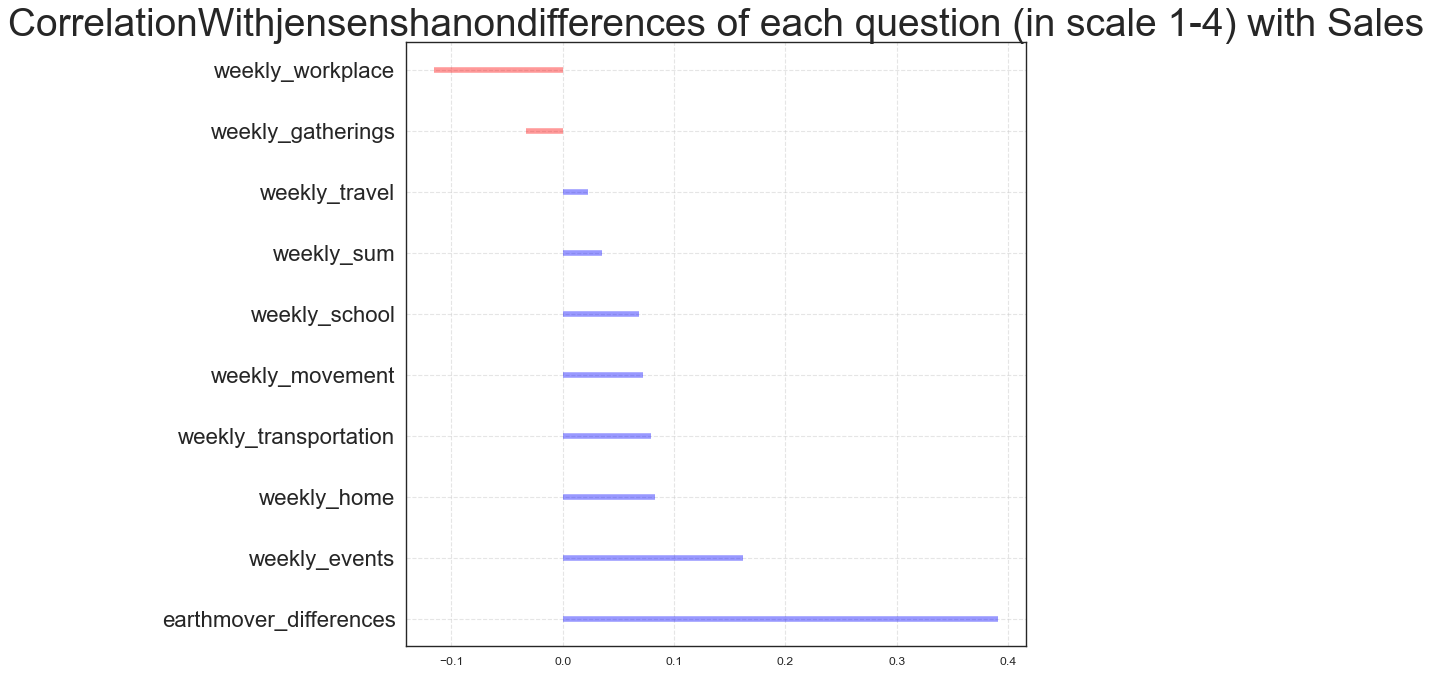

In [136]:
#label_correlation.sort_values("CorrelationWithPC1", inplace=True)

# Draw plot
plt.figure(figsize=(10, 10), dpi=80)
  
# Plotting the horizontal lines
plt.hlines(y=label_correlation.Attribute, xmin=0, xmax=label_correlation.CorrelationWithjensenshanondifferences,color=label_correlation.color,
          alpha=0.4, linewidth=5)
  
# Decorations
# Setting the labels of x-axis and y-axis
#plt.gca().set(ylabel='Quarter', xlabel='Sales')
  
# Setting Date to y-axis
plt.yticks(label_correlation.Attribute, fontsize=20)
  
# Title of Bar Chart
plt.title('CorrelationWithjensenshanondifferences of each question (in scale 1-4) with Sales', fontdict={
          'size': 35})
  
# Optional grid layout
plt.grid(linestyle='--', alpha=0.5)
  
# Displaying the Diverging Bar Chart
plt.show()

## Earthmover correaltions plot

In [137]:

label_correlation = corr.sort_values(by='earthmover_differences', ascending=False)[['earthmover_differences']]
label_correlation = label_correlation.reset_index()
label_correlation.columns = ['Attribute', 'CorrelationWithearthmoverdifferences']
label_correlation = label_correlation.iloc[1: , :]
label_correlation = label_correlation.reset_index()
label_correlation.head()




label_correlation['color']='NAN'

for i in range (label_correlation.shape[0]):
    
    #label_correlation.questions[i]= str(label_correlation.Attribute[i])+": "+questions_dict[label_correlation.Attribute[i]]
    
    if (label_correlation.CorrelationWithearthmoverdifferences[i]<0):
        label_correlation.color[i] = "red"
    else:
        label_correlation.color[i] = "blue"

print(label_correlation.nlargest(10,'CorrelationWithearthmoverdifferences'))  #print 10 best features 




   index                 Attribute  CorrelationWithearthmoverdifferences color
0      1     weekly_transportation                              0.396129  blue
1      2  jensenshanon_differences                              0.390880  blue
2      3             weekly_events                              0.307099  blue
3      4           weekly_movement                              0.297266  blue
4      5                weekly_sum                              0.238376  blue
5      6             weekly_school                              0.217116  blue
6      7         weekly_gatherings                              0.194363  blue
7      8               weekly_home                              0.178471  blue
8      9          weekly_workplace                              0.149273  blue
9     10             weekly_travel                              0.065109  blue


/Users/luna/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


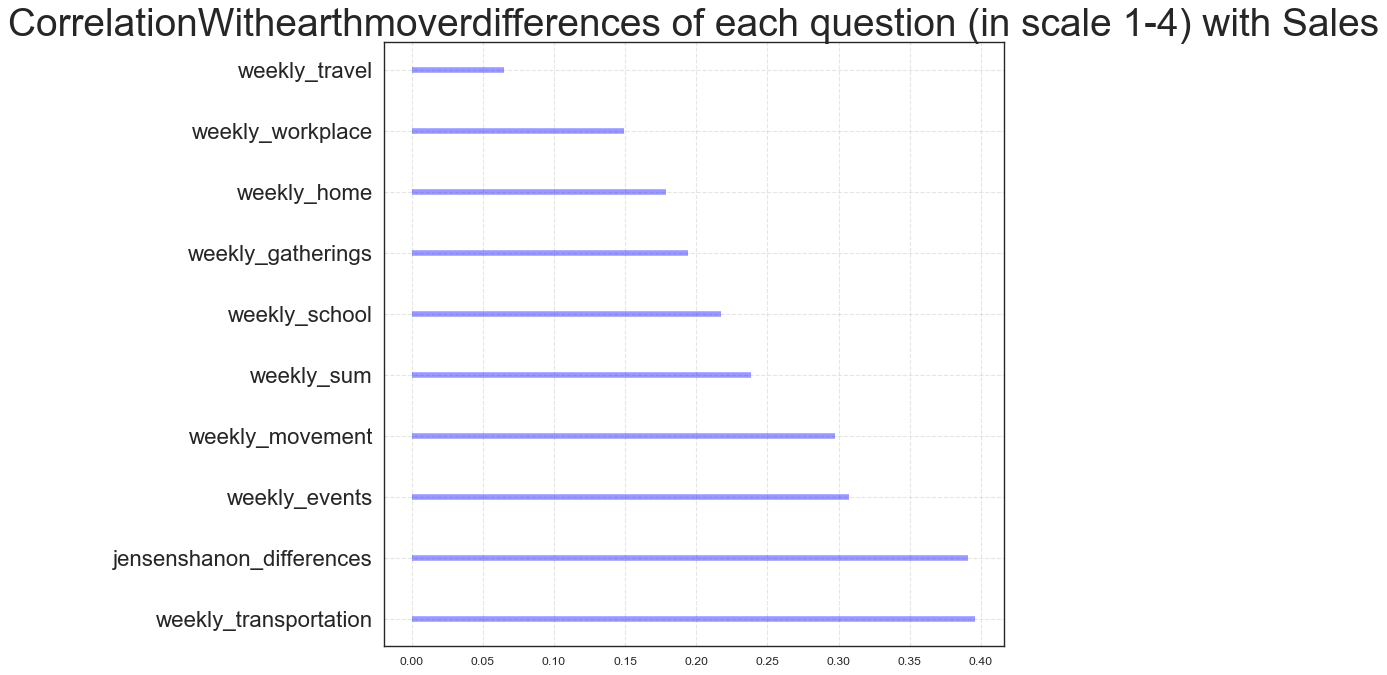

In [138]:


#label_correlation.sort_values("CorrelationWithPC1", inplace=True)

# Draw plot
plt.figure(figsize=(10, 10), dpi=80)
  
# Plotting the horizontal lines
plt.hlines(y=label_correlation.Attribute, xmin=0, xmax=label_correlation.CorrelationWithearthmoverdifferences,color=label_correlation.color,
          alpha=0.4, linewidth=5)
  
# Decorations
# Setting the labels of x-axis and y-axis
#plt.gca().set(ylabel='Quarter', xlabel='Sales')
  
# Setting Date to y-axis
plt.yticks(label_correlation.Attribute, fontsize=20)
  
# Title of Bar Chart
plt.title('CorrelationWithearthmoverdifferences of each question (in scale 1-4) with Sales', fontdict={
          'size': 35})
  
# Optional grid layout
plt.grid(linestyle='--', alpha=0.5)
  
# Displaying the Diverging Bar Chart
plt.show()

## 3.5.2 PCA

### 3.5.2.1 PCA calclations using the built in library

In [139]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA


# Standardizing the features
x = StandardScaler().fit_transform(df_final)
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(x)
principalDf = pd.DataFrame(data = principalComponents
             , columns = ['principal component 1', 'principal component 2'])

principalDf
 

,principal component 1,principal component 2
0,3.525020,-1.240566
1,3.525020,-1.240566
2,3.525020,-1.240566
3,3.525020,-1.240566
4,3.525020,-1.240566
5,3.525020,-1.240566
6,3.525020,-1.240566
7,3.525020,-1.240566
8,3.525020,-1.240566
9,1.386339,-0.768114


### Explained variance by the first and second PC

In [140]:
pca.explained_variance_ratio_


array([0.72323565, 0.12452873])

In [141]:
PC1=list(principalDf.iloc[:,0])

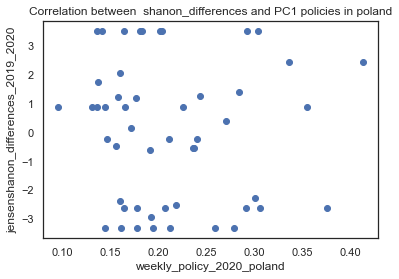

correlation and p_value are:  -0.05184857341073733 0.7206483179605588


In [142]:

#jensen shanon divergence

jensenshanon_differences= []

#print(extracted_daily_ratio_2020[1])


for i in range(len(array_weekly_ratios_poland_2019)) :
    jensenshanon_differences.append(distance.jensenshannon(array_weekly_ratios_poland_2019[i], array_weekly_ratios_poland_2020[i]))
    
plt.scatter(jensenshanon_differences, PC1) 

plt.title('Correlation between  shanon_differences and PC1 policies in poland')
plt.xlabel('weekly_policy_2020_poland')
plt.ylabel('jensenshanon_differences_2019_2020')
plt.show()

corr, p_value=stats.pearsonr(jensenshanon_differences, PC1)
print("correlation and p_value are: ", corr, p_value)

jensen_correlations['PC1_basic_jensen']=corr



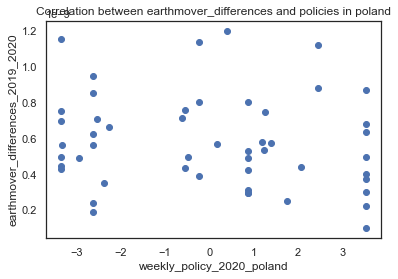

correlation and p_value are:  -0.14937839625170313 0.3004951741394179


In [143]:
#earthmover   
    
#first we find the difference between array_weekly_ratios_poland_2019[i] and array_weekly_ratios_poland_2020[i]  
#and append this difference to a list

#dependent variable

earthmover_differences= []
for i in range(len(array_weekly_ratios_poland_2019)) :
    earthmover_differences.append(wasserstein_distance(array_weekly_ratios_poland_2019_weeklyyearlynorm[i], array_weekly_ratios_poland_2020_weeklyyearlynorm[i]))


plt.scatter(PC1, earthmover_differences) 
plt.title('Correlation between earthmover_differences and policies in poland')
plt.xlabel('weekly_policy_2020_poland')
plt.ylabel('earthmover_differences_2019_2020')
plt.show()

corr, p_value=stats.pearsonr(earthmover_differences, PC1)
print("correlation and p_value are: ", corr, p_value)


earth_correlations['PC1_basic_earth']=corr



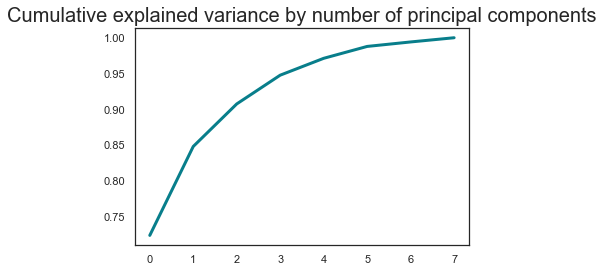

In [144]:


pca = PCA().fit(StandardScaler().fit_transform(df_final))

plt.plot(pca.explained_variance_ratio_.cumsum(), lw=3, color='#087E8B')
plt.title('Cumulative explained variance by number of principal components', size=20)
plt.show()

In [145]:
loadings = pd.DataFrame(
    data=pca.components_.T * np.sqrt(pca.explained_variance_), 
    columns=[f'PC{i}' for i in range(1, len(df_final.columns) + 1)],
    index=df_final.columns
)
loadings.head(20)

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8
weekly_school,-0.940000,0.250751,0.133131,0.056276,-0.078319,-0.140413,-0.026287,-0.162788
weekly_workplace,-0.792980,0.533193,-0.083545,-0.094568,-0.282222,0.079652,0.007286,0.072980
weekly_events,-0.893554,-0.273374,0.092157,0.305707,-0.051677,-0.173965,0.056736,0.095568
weekly_gatherings,-0.910480,-0.011435,-0.206396,-0.325576,0.144293,-0.083918,0.121824,-0.001342
weekly_transportation,-0.812112,-0.134706,-0.530079,0.214851,0.047753,0.099736,-0.048057,-0.032487
weekly_home,-0.856418,-0.436952,0.081565,-0.251658,-0.026691,-0.038873,-0.149094,0.039913
weekly_movement,-0.858609,-0.369648,0.283114,0.020919,-0.032433,0.240000,0.073898,-0.043073
weekly_travel,-0.796210,0.498812,0.206258,0.085951,0.281512,0.058913,-0.049506,0.050439


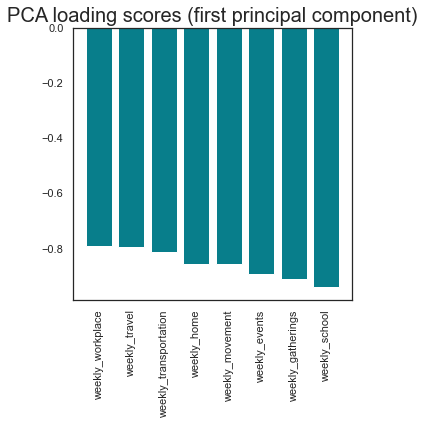

In [146]:
pc1_loadings = loadings.sort_values(by='PC1', ascending=False)[['PC1']]
pc1_loadings = pc1_loadings.reset_index()
pc1_loadings.columns = ['Attribute', 'CorrelationWithPC1']


f, ax = plt.subplots(figsize=(5, 5))


plt.bar(x=pc1_loadings['Attribute'], height=pc1_loadings['CorrelationWithPC1'], color='#087E8B')
plt.title('PCA loading scores (first principal component)', size=20)
plt.xticks(rotation='vertical')
plt.show()

In [147]:

pc1_loadings['color']='NAN'
for i in range (pc1_loadings .shape[0]):
    
    if (pc1_loadings.CorrelationWithPC1[i]<0):
        pc1_loadings.color[i] = "red"
    else:
        pc1_loadings.color[i] = "blue"

    

print(pc1_loadings .nlargest(10,'CorrelationWithPC1'))  #print 10 best features 




               Attribute  CorrelationWithPC1 color
0       weekly_workplace           -0.792980   red
1          weekly_travel           -0.796210   red
2  weekly_transportation           -0.812112   red
3            weekly_home           -0.856418   red
4        weekly_movement           -0.858609   red
5          weekly_events           -0.893554   red
6      weekly_gatherings           -0.910480   red
7          weekly_school           -0.940000   red


/Users/luna/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


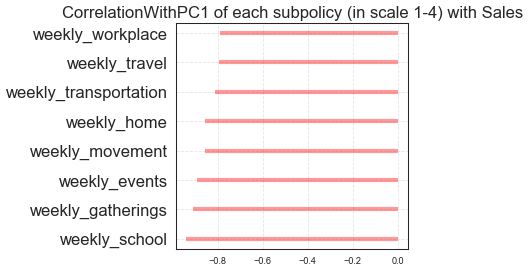

In [148]:
pc1_loadings.sort_values("CorrelationWithPC1", inplace=True)

# Draw plot
plt.figure(figsize=(5, 5), dpi=60)
  
# Plotting the horizontal lines
plt.hlines(y=pc1_loadings.Attribute, xmin=0, xmax=pc1_loadings.CorrelationWithPC1,color=pc1_loadings.color,
          alpha=0.4, linewidth=5)
  
# Decorations
# Setting the labels of x-axis and y-axis
#plt.gca().set(ylabel='Quarter', xlabel='Sales')
  
# Setting Date to y-axis
plt.yticks(pc1_loadings.Attribute, fontsize=20)
  
# Title of Bar Chart
plt.title('CorrelationWithPC1 of each subpolicy (in scale 1-4) with Sales', fontdict={
          'size': 20})
  
# Optional grid layout
plt.grid(linestyle='--', alpha=0.5)
  
# Displaying the Diverging Bar Chart
plt.show()

### 3.5.2.2 PCA calculations manually 

In [149]:

#1
df2_meaned=df_final.apply(lambda x:x-x.mean())
df2_meaned
#2 covariance
cov_mat =df2_meaned.cov()
cov_mat

,weekly_school,weekly_workplace,weekly_events,weekly_gatherings,weekly_transportation,weekly_home,weekly_movement,weekly_travel
weekly_school,1.169979,0.816360,0.785373,1.371362,0.339342,0.380458,0.594219,1.258992
weekly_workplace,0.816360,0.799134,0.426955,1.010312,0.249829,0.211712,0.326731,0.959000
weekly_events,0.785373,0.426955,0.831953,1.023307,0.326797,0.376810,0.593120,0.730429
weekly_gatherings,1.371362,1.010312,1.023307,2.584790,0.590887,0.674119,0.856243,1.461258
weekly_transportation,0.339342,0.249829,0.326797,0.590887,0.235310,0.160991,0.227847,0.330621
weekly_home,0.380458,0.211712,0.376810,0.674119,0.160991,0.265065,0.347514,0.316476
weekly_movement,0.594219,0.326731,0.593120,0.856243,0.227847,0.347514,0.594261,0.577068
weekly_travel,1.258992,0.959000,0.730429,1.461258,0.330621,0.316476,0.577068,1.869796


In [150]:
eig_value, eig_vectors =np.linalg.eig(cov_mat)
#eig_vectors
sorted_index =np.argsort(eig_value)[::-1]
sorted_eigenvalue=eig_value[sorted_index]
sorted_eigenvector= eig_vectors[:,sorted_index]

In [151]:
n_components=2
eig_vector_subset=sorted_eigenvector[:,0:n_components]
X_reduced=np.dot(eig_vector_subset.transpose(), df2_meaned.transpose()).transpose()
principal_df2_two_dim=pd.DataFrame(X_reduced, columns=['PC1','PC2'])
print(principal_df2_two_dim)


         PC1       PC2
0  -4.171823  1.018797
1  -4.171823  1.018797
2  -4.171823  1.018797
3  -4.171823  1.018797
4  -4.171823  1.018797
5  -4.171823  1.018797
6  -4.171823  1.018797
7  -4.171823  1.018797
8  -4.171823  1.018797
9  -2.005652  0.185313
10  0.316852 -1.995852
11  0.316852 -1.995852
12  2.805028  0.249287
13  3.211076  0.553348
14  3.204589  0.500752
15  3.204589  0.500752
16  3.204589  0.500752
17  3.204589  0.500752
18  3.204589  0.500752
19  3.204589  0.500752
20  2.334636  0.258165
21  0.766650 -1.209625
22  0.699011 -1.283682
23  0.233883 -0.611269
24  0.233883 -0.611269
25  0.233883 -0.611269
26 -0.016551 -0.840597
27 -0.204376 -1.012593
28 -0.204376 -1.012593
29 -0.204376 -1.012593
30 -0.204376 -1.012593
31 -0.204376 -1.012593
32 -0.204376 -1.012593
33 -0.204376 -1.012593
34 -0.551597 -0.869629
35 -0.609467 -0.845802
36 -1.364559 -0.982701
37 -2.371349 -1.165234
38 -2.371349 -1.165234
39 -1.868059 -0.761148
40 -0.442483  0.364280
41  0.871455  0.655593
42  2.09763

In [152]:
principal_df2_two_dim.var()

PC1    6.382647
PC2    0.917148
dtype: float64

In [153]:
PC1=list(principal_df2_two_dim.iloc[:,0])

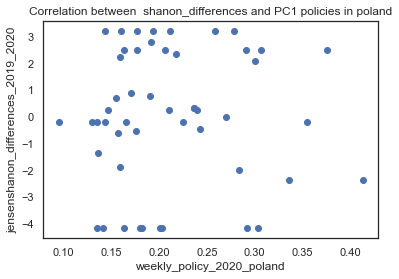

correlation and p_value are:  0.020410985939915666 0.8881135898657133


In [154]:

#jensen shanon divergence

jensenshanon_differences= []

#print(extracted_daily_ratio_2020[1])


for i in range(len(array_weekly_ratios_poland_2019)) :
    jensenshanon_differences.append(distance.jensenshannon(array_weekly_ratios_poland_2019[i], array_weekly_ratios_poland_2020[i]))
    
plt.scatter(jensenshanon_differences, PC1) 

plt.title('Correlation between  shanon_differences and PC1 policies in poland')
plt.xlabel('weekly_policy_2020_poland')
plt.ylabel('jensenshanon_differences_2019_2020')
plt.show()

corr, p_value=stats.pearsonr(jensenshanon_differences, PC1)
print("correlation and p_value are: ", corr, p_value)

jensen_correlations['PC1_basic_jensen']=corr





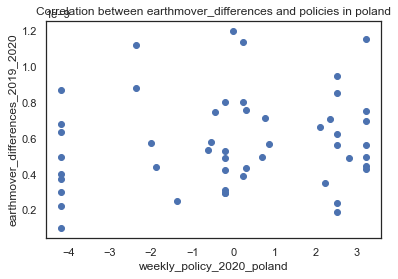

correlation and p_value are:  0.15369066971387432 0.286596867558431


In [155]:
#earthmover   
    
#first we find the difference between array_weekly_ratios_poland_2019[i] and array_weekly_ratios_poland_2020[i]  
#and append this difference to a list

#dependent variable

earthmover_differences= []
for i in range(len(array_weekly_ratios_poland_2019)) :
    earthmover_differences.append(wasserstein_distance(array_weekly_ratios_poland_2019_weeklyyearlynorm[i], array_weekly_ratios_poland_2020_weeklyyearlynorm[i]))


plt.scatter(PC1, earthmover_differences) 
plt.title('Correlation between earthmover_differences and policies in poland')
plt.xlabel('weekly_policy_2020_poland')
plt.ylabel('earthmover_differences_2019_2020')
plt.show()

corr, p_value=stats.pearsonr(earthmover_differences, PC1)
print("correlation and p_value are: ", corr, p_value)


earth_correlations['PC1_basic_earth']=corr



### 4. Results

In [156]:
print( "EARTH MOVER:\n")
for key, value in earth_correlations.items():
    print(key, ' : ', value)
    
print("\n")
print( "JENSEN SHANON:\n")

for key, value in jensen_correlations.items():
    print(key, ' : ', value)


EARTH MOVER:

ex1 : normalizedweekly_earth  :  0.01432039204322669
ex0 : normalizedyearly_earth  :  0.048086078870750136
ex2 : normalizedyearlyweekly_earth  :  0.05065815902151055
ex3 : without_outlier10_earth  :  0.0888845796977169
ex4 : normalizedyearlyweekly_without_outlier10_earth  :  0.1540511842915197
ex5 : movingAverage_originalvalues_earth  :  0.23837596398301522
PC1_basic_earth  :  0.15369066971387432


JENSEN SHANON:

ex1 : normalizedweekly_jensen  :  -0.026948276667038196
ex0 : normalizedyearly_earth  :  nan
ex2 : normalizedyearlyweekly_jensen  :  -0.026948276667038237
ex3 : without_outlier10_jensen  :  0.03547449819451515
ex4 : normalizedyearlyweekly_without_outlier10_jensen  :  0.035543313680389405
ex5 : movingAverage_originalvalues_jensesn  :  -0.026034235358545876
PC1_basic_jensen  :  0.020410985939915666
